In [14]:
from pathlib import Path
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = np.random.uniform(-1, 1, size=(1000,1))
y = 2*X**3+X**2-X+ 0.1 * np.random.randn(1000, 1)
y_model=2*X**3+X**2-X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(units=2**4, activation="tanh"),
   # tf.keras.layers.Dense(units=2**5, activation="tanh"),
    #tf.keras.layers.Dense(units=2**6, activation="tanh"),
    #tf.keras.layers.Dense(units=2**7, activation="tanh"),
    #tf.keras.layers.Dense(units=2**7, activation="tanh"),
    #tf.keras.layers.Dense(units=2**6, activation="tanh"),
    #tf.keras.layers.Dense(units=2**5, activation="tanh"),
    #tf.keras.layers.Dense(units=2**4, activation="tanh"),
    tf.keras.layers.Dense(units=2**3, activation="tanh"),
    tf.keras.layers.Dense(units=2**2, activation="tanh"),
    tf.keras.layers.Dense(1)                  # Output layer with a single neuron (for regression)
])

model.build(input_shape=(None,1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
# You can adjust the number of epochs and batch size based on your data and resources.
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

np.savetxt('x.txt',X, delimiter="," )
np.savetxt('y.txt',y, delimiter=",")

model.save('regresion.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 0.8477 - val_loss: 0.7954
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6039 - val_loss: 0.5758
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4528 - val_loss: 0.4361
Epoch 4/100
25/25 [========

In [15]:
print(X.shape)

(1000, 1)


In [16]:
from tensorflow import keras
keras.__version__

'2.10.0'

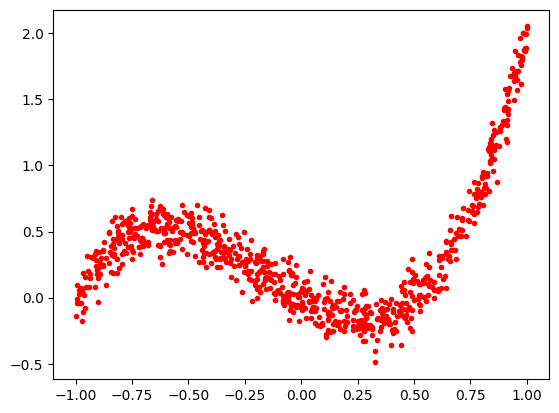

In [17]:
# plot train_x test_x

plt.plot(X_train, y_train, "r.")
#plt.plot(test_x, test_y, "b.")
plt.show()

In [18]:
print(X_test.shape,y_test.shape)
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")


(200, 1) (200, 1)
7/7 [==============================] - 0s 1ms/step - loss: 0.0294
Test Loss: 0.0294


In [19]:
# Use the trained model to make predictions on new data
new_data = np.array([[1]])
predictions = model.predict(X_test)
print(predictions)

mse = np.mean((predictions - y_test) ** 2)
print(mse)

7/7 [==============================] - 0s 5ms/step
[[ 0.47674233]
 [-0.08227742]
 [ 0.4858871 ]
 [ 0.45822698]
 [ 0.61528647]
 [ 0.41966468]
 [ 0.15986645]
 [ 0.45580882]
 [ 0.4031803 ]
 [ 0.46329987]
 [-0.0277729 ]
 [ 0.40636182]
 [ 0.502221  ]
 [ 1.0518072 ]
 [ 0.02306461]
 [ 0.29460102]
 [-0.00872529]
 [ 0.01453823]
 [-0.07139933]
 [ 1.5323176 ]
 [-0.00984132]
 [ 0.17040741]
 [ 0.21340197]
 [ 0.05771548]
 [ 0.51179165]
 [ 0.41427833]
 [ 0.20725358]
 [ 0.48435485]
 [ 0.49717867]
 [ 0.2694888 ]
 [ 0.21149272]
 [-0.07470512]
 [-0.00501233]
 [ 1.5404823 ]
 [ 0.03135931]
 [ 0.3059281 ]
 [ 1.1801469 ]
 [ 0.44870675]
 [-0.07359254]
 [ 0.04058164]
 [ 0.0739066 ]
 [ 0.47589207]
 [ 0.34992266]
 [ 1.1995122 ]
 [ 1.4251034 ]
 [ 1.4333405 ]
 [ 0.47120833]
 [ 0.27296996]
 [ 0.49054044]
 [ 0.24631661]
 [-0.06677109]
 [ 0.25763607]
 [ 0.47743225]
 [ 0.12544173]
 [-0.03625184]
 [-0.07714021]
 [ 0.07207143]
 [ 1.279937  ]
 [-0.0294683 ]
 [ 0.8938216 ]
 [ 0.1589393 ]
 [ 1.4114182 ]
 [ 0.41483223]
 [ 0

7/7 [==============================] - 0s 1ms/step


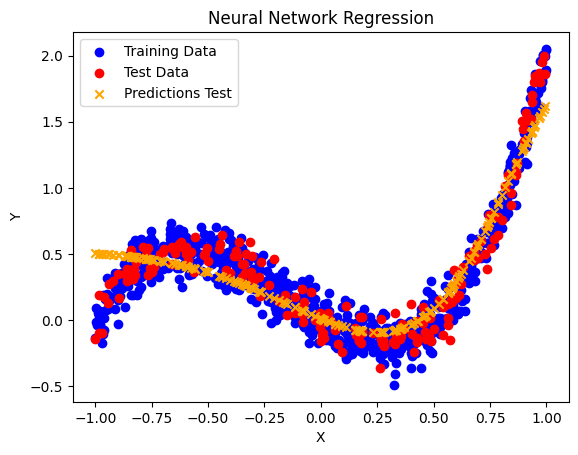

In [20]:
predictions_test = model.predict(X_test)

# Plot the actual data and model predictions
plt.scatter(X_train, y_train, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.scatter(X_test, predictions_test, label='Predictions Test', color='orange', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Neural Network Regression')
plt.show()

In [21]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.45.3', 'qiskit-aer': '0.12.2', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit-nature': '0.6.2', 'qiskit-finance': None, 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}

In [22]:
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import *

In [23]:
dic={(1, 1): 114340.22509092675, (2, 2): -130151.29838101947, (3, 3): -107696.32541100474, (4, 4): -137605.45948654885, (5, 5): 30824.337051810944, (6, 6): -4953.840574800648, (7, 7): 199320.34494737975, (8, 8): -17973.21953323236, (9, 9): -25636.031728839225, (10, 10): -113173.20888941351, (11, 11): 74296.08161258441, (12, 12): -42825.38990341306, (13, 13): -123005.88665255645, (14, 14): -69573.75619648935, (15, 15): 109907.54040932836, (16, 16): 157490.80499253614, (17, 17): -120134.18946538711, (18, 18): -61189.69056987637, (19, 19): 138611.96840421736, (20, 20): 144765.373036034, (21, 21): -54107.466976928, (22, 22): 21774.312393819826, (23, 23): 70113.0996325746, (24, 24): 15300.870234667425, (25, 25): -112111.35891181463, (26, 26): 149191.63215965027, (27, 27): 167369.44049953035, (28, 28): 
-17228.05923910754, (29, 29): -127622.62117046416, (30, 30): 168886.96064170514, (31, 31): 139431.64123871882, (32, 32): -67729.5561738337, (33, 33): 5936.855834154267, (34, 34): -86930.95388719486, (35, 35): 42484.16497550191, (36, 36): 172703.9660796591, (37, 37): -106796.8381512099, (38, 38): -141384.2899710479, (39, 39): 71115.24769419116, (40, 40): 133580.0499702955, (41, 41): 167731.04282621323, (42, 42): 4141.192671353005, (43, 43): 244108.62656098223, (44, 44): -77845.8474632971, (45, 45): 108991.89098533517, (46, 46): 104278.49329361157, (47, 47): -139101.26868110866, (48, 48): 9146.897140751527, (49, 49): 19558.911541264693, (1, 2): -15637.5, (1, 3): -22918.5, (1, 4): -16749.0, (1, 5): 14991.0, (1, 6): 5793.0, (1, 7): 15874.5, (1, 8): 18571.5, (1, 9): -24744.0, (1, 10): -17202.0, (1, 11): 19374.0, (1, 12): 8541.0, (1, 13): -10069.5, (1, 14): -20155.5, (1, 15): -5899.5, (1, 16): -12336.0, (1, 17): -21643.5, (1, 18): 9025.5, (1, 19): 1263.0, (1, 20): 8092.5, (1, 21): 6201.0, (1, 22): -15924.0, (1, 23): 24228.0, (1, 24): 21621.0, (1, 25): -11769.0, (1, 26): 1992.0, (1, 27): -4254.0, (1, 28): -2824.5, (1, 29): -31998.0, (1, 30): 26386.5, (1, 31): 5572.5, (1, 32): -26773.5, (1, 33): 20683.5, (1, 34): 3859.5, (1, 35): 4732.5, (1, 36): 27928.5, (1, 37): -8022.0, (1, 38): -25470.0, (1, 39): 12075.0, (1, 40): -12882.0, (1, 41): -14652.0, (1, 42): -11848.5, (1, 43): 30508.5, (1, 44): 
-19972.5, (1, 45): -6844.5, (1, 46): 21910.5, (1, 47): -29254.5, (1, 48): -19345.5, (1, 49): -18408.0, (2, 1): -15637.5, (2, 3): 23512.5, (2, 4): 30225.0, (2, 5): -3150.0, (2, 6): 1537.5, (2, 7): -29812.5, (2, 8): 11700.0, (2, 9): 9037.5, (2, 10): 23775.0, (2, 11): -10125.0, (2, 12): 11175.0, (2, 13): 26737.5, (2, 14): 15112.5, (2, 15): -15825.0, (2, 16): -19837.5, (2, 17): 26062.5, (2, 18): 16912.5, (2, 19): -20887.5, (2, 20): -22425.0, (2, 21): 13012.5, (2, 22): -1125.0, (2, 23): -7050.0, (2, 24): 4500.0, (2, 25): 23437.5, (2, 26): -22350.0, (2, 27): -23325.0, (2, 28): 3112.5, (2, 29): 30862.5, (2, 30): -24150.0, (2, 31): -21525.0, (2, 32): 16875.0, (2, 33): 6337.5, (2, 34): 21562.5, (2, 35): -7200.0, (2, 36): -24300.0, (2, 37): 22500.0, (2, 38): 32137.5, (2, 39): -11325.0, (2, 40): -16837.5, (2, 41): -20212.5, (2, 42): 525.0, (2, 43): -34237.5, (2, 44): 16650.0, (2, 45): -15487.5, (2, 46): -14737.5, (2, 47): 32587.5, (2, 48): 1800.0, (2, 49): -37.5, (3, 1): -22918.5, (3, 2): 23512.5, (3, 4): 25233.0, (3, 5): -10917.0, (3, 6): -2874.0, (3, 7): -24484.5, (3, 8): -5908.5, (3, 9): 19893.0, (3, 10): 22368.0, (3, 11): -17064.0, (3, 12): 111.0, (3, 13): 19351.5, (3, 14): 19987.5, (3, 15): -4033.5, (3, 16): -1965.0, (3, 17): 26263.5, (3, 18): 2608.5, (3, 19): -10986.0, (3, 20): -16009.5, (3, 21): 2472.0, (3, 22): 9414.0, (3, 23): -18600.0, (3, 24): -11331.0, (3, 25): 18804.0, (3, 26): -12156.0, (3, 27): -8724.0, (3, 28): 3286.5, (3, 29): 35085.0, (3, 30): -28297.5, (3, 31): -13993.5, (3, 32): 24988.5, (3, 33): -9847.5, (3, 34): 8110.5, (3, 35): -6475.5, (3, 36): -29335.5, (3, 37): 16002.0, (3, 38): 31623.0, (3, 39): -13083.0, (3, 40): -159.0, (3, 41): -699.0, (3, 42): 7669.5, (3, 43): -35800.5, (3, 44): 20623.5, (3, 45): -3277.5, (3, 46): -20902.5, (3, 47): 34210.5, (3, 48): 12982.5, (3, 49): 11499.0, (4, 1): -16749.0, (4, 2): 30225.0, (4, 3): 25233.0, (4, 5): -3338.0, (4, 6): 1676.0, (4, 7): -32041.0, (4, 8): 12663.0, (4, 9): 9642.0, (4, 10): 25536.0, (4, 11): -10832.0, (4, 12): 
12062.0, (4, 13): 28751.0, (4, 14): 16199.0, (4, 15): -17059.0, (4, 16): -21402.0, (4, 17): 27983.0, (4, 18): 18241.0, (4, 19): -22484.0, (4, 20): -24115.0, (4, 21): 14032.0, (4, 22): -1268.0, (4, 23): -7504.0, (4, 24): 4922.0, (4, 25): 25192.0, (4, 26): -24056.0, (4, 27): -25128.0, (4, 28): 3341.0, (4, 29): 33114.0, (4, 30): -25907.0, (4, 31): -23155.0, (4, 32): 18073.0, (4, 33): 6897.0, (4, 34): 23229.0, (4, 35): -7735.0, (4, 36): -26063.0, (4, 37): 24196.0, (4, 38): 34510.0, (4, 39): -12150.0, (4, 40): -18174.0, (4, 41): -21814.0, (4, 42): 523.0, (4, 43): -36753.0, (4, 44): 17855.0, (4, 45): -16699.0, (4, 46): -15789.0, (4, 47): 34981.0, (4, 48): 1869.0, (4, 49): -106.0, (5, 1): 14991.0, (5, 2): -3150.0, (5, 3): -10917.0, (5, 4): -3338.0, (5, 6): 5421.0, (5, 7): 2749.0, (5, 8): 19788.0, (5, 9): -17603.0, (5, 10): -6014.0, (5, 11): 12698.0, (5, 12): 11162.0, (5, 13): 1041.0, (5, 14): -11581.0, (5, 15): -10594.0, (5, 16): -17437.0, (5, 17): -8937.0, (5, 18): 13611.0, (5, 19): -6369.0, (5, 
20): -1170.0, (5, 21): 9847.0, (5, 22): -13798.0, (5, 23): 17876.0, (5, 24): 19792.0, (5, 25): -1563.0, (5, 26): -6276.0, (5, 27): -11878.0, (5, 28): -1269.0, (5, 29): -15941.0, (5, 30): 13608.0, (5, 31): -2970.0, (5, 32): -16522.0, (5, 33): 19657.0, (5, 34): 10919.0, (5, 35): 1420.0, (5, 36): 14852.0, (5, 37): 1256.0, (5, 38): -9995.0, (5, 39): 6130.0, (5, 40): -16829.0, (5, 41): -19519.0, (5, 42): -9782.0, (5, 43): 13487.0, (5, 44): -10880.0, (5, 45): -11269.0, (5, 46): 13191.0, (5, 47): -13019.0, (5, 48): -15636.0, (5, 49): -15501.0, (6, 1): 5793.0, (6, 2): 1537.5, (6, 3): -2874.0, (6, 4): 1676.0, (6, 5): 5421.0, (6, 7): -1926.0, (6, 8): 11233.5, (6, 9): -7836.5, (6, 10): -383.0, (6, 11): 5253.0, (6, 12): 6844.0, (6, 13): 3488.0, (6, 14): -4139.0, (6, 15): -7074.5, (6, 16): -10955.5, (6, 17): -1597.0, (6, 18): 8710.0, (6, 19): -5514.5, (6, 20): -3074.5, (6, 21): 6387.5, (6, 22): -7053.0, (6, 23): 8194.0, (6, 24): 10437.0, (6, 25): 1814.5, (6, 26): -5630.0, (6, 27): -8551.0, (6, 28): -292.0, (6, 29): -4581.5, (6, 30): 4154.5, (6, 31): -3878.5, (6, 32): -6424.5, (6, 33): 10573.0, (6, 34): 7874.0, (6, 35): -85.5, (6, 36): 4762.5, (6, 37): 3126.0, (6, 38): -1454.5, (6, 39): 1822.0, (6, 40): -10317.5, (6, 41): -12042.5, (6, 42): -4853.5, (6, 43): 2975.0, (6, 44): -3616.5, (6, 45): -7376.0, (6, 46): 4989.0, (6, 47): -2923.0, (6, 48): -7651.5, (6, 49): -7787.5, (7, 1): 15874.5, (7, 2): -29812.5, (7, 3): -24484.5, (7, 4): -32041.0, (7, 5): 2749.0, (7, 6): -1926.0, (7, 8): -13519.5, (7, 9): -8701.0, (7, 10): -25024.0, (7, 11): 10120.0, (7, 12): -12503.0, (7, 13): -28555.5, (7, 14): -15495.5, (7, 15): 17429.5, (7, 16): 22069.0, (7, 17): -27307.5, (7, 18): -18748.5, (7, 19): 22602.0, (7, 20): 23965.5, (7, 21): -14392.0, (7, 22): 1930.0, (7, 23): 6568.0, (7, 24): -5845.0, (7, 25): -24900.0, (7, 26): 24156.0, (7, 27): 25492.0, (7, 28): -3250.5, (7, 29): -32053.0, (7, 30): 25021.5, (7, 31): 23101.5, (7, 32): -17112.5, (7, 33): -7796.5, (7, 34): -23562.5, (7, 35): 7599.5, (7, 36): 25115.5, (7, 37): -24050.0, (7, 38): -33727.0, (7, 39): 11747.0, (7, 40): 18839.0, (7, 41): 22579.0, (7, 42): -41.5, (7, 43): 35780.5, (7, 44): -17171.5, (7, 45): 17105.5, (7, 46): 15010.5, (7, 47): -34046.5, (7, 48): -1090.5, (7, 49): 861.0, (8, 1): 18571.5, (8, 2): 11700.0, (8, 3): -5908.5, (8, 4): 12663.0, (8, 5): 19788.0, (8, 6): 11233.5, (8, 7): -13519.5, (8, 9): -27664.5, (8, 10): 3543.0, (8, 11): 17691.0, (8, 12): 28161.0, (8, 13): 18766.5, (8, 14): -12442.5, (8, 15): -30006.0, (8, 16): -45487.5, (8, 17): -556.5, (8, 18): 36403.5, (8, 19): -25183.5, (8, 20): -16302.0, (8, 21): 26824.5, (8, 22): 
-26841.0, (8, 23): 29430.0, (8, 24): 40314.0, (8, 25): 11761.5, (8, 26): -25926.0, (8, 27): -37149.0, (8, 28): -448.5, (8, 29): -10807.5, (8, 30): 10605.0, (8, 31): -19146.0, (8, 32): -20694.0, (8, 33): 41212.5, (8, 34): 34225.5, (8, 35): -1833.0, (8, 36): 12867.0, (8, 37): 16512.0, (8, 38): 1255.5, (8, 39): 4497.0, (8, 40): -42451.5, (8, 41): -49666.5, (8, 42): -18198.0, (8, 43): 4039.5, (8, 44): -10149.0, (8, 45): -31072.5, (8, 46): 15727.5, (8, 47): -4189.5, (8, 48): -28485.0, (8, 49): -29383.5, (9, 1): -24744.0, (9, 2): 9037.5, (9, 3): 19893.0, (9, 4): 9642.0, (9, 5): -17603.0, (9, 6): -7836.5, (9, 7): -8701.0, (9, 8): -27664.5, (9, 10): 12631.0, (9, 11): -20477.0, (9, 12): -14898.0, (9, 13): 2581.0, (9, 14): 19584.0, (9, 15): 13333.5, (9, 16): 22905.5, (9, 17): 17338.0, (9, 18): -17659.0, (9, 19): 6258.5, (9, 20): -1722.5, (9, 21): -12655.5, (9, 22): 20377.0, (9, 23): -27714.0, (9, 24): -28783.0, (9, 25): 5949.5, (9, 26): 5894.0, (9, 27): 14087.0, (9, 28): 2371.0, (9, 29): 28511.5, (9, 30): -23999.5, (9, 31): 1097.5, (9, 32): 27215.5, (9, 33): -28298.0, (9, 34): -12931.0, (9, 35): -3227.5, (9, 36): -25875.5, (9, 37): 1606.0, (9, 38): 19852.5, (9, 39): -10880.0, (9, 40): 22463.5, (9, 41): 25948.5, (9, 42): 14650.5, (9, 43): -25378.0, (9, 44): 18777.5, (9, 45): 14391.0, (9, 46): -21924.0, (9, 47): 24426.0, (9, 48): 23566.5, (9, 49): 23081.5, (10, 1): -17202.0, (10, 2): 23775.0, (10, 3): 22368.0, (10, 4): 25536.0, (10, 5): -6014.0, (10, 6): -383.0, (10, 7): -25024.0, (10, 8): 3543.0, (10, 9): 12631.0, (10, 11): -12038.0, (10, 12): 5712.0, (10, 13): 21388.0, (10, 14): 15750.0, (10, 15): -9657.0, (10, 16): -10855.0, (10, 17): 23842.0, (10, 18): 9632.0, (10, 19): -15037.0, (10, 20): -17849.0, (10, 21): 7599.0, (10, 22): 3238.0, (10, 23): -11100.0, (10, 24): -2302.0, (10, 25): 19493.0, (10, 26): -16252.0, (10, 27): -15358.0, (10, 28): 2908.0, (10, 29): 29845.0, (10, 30): -23695.0, (10, 31): -16577.0, (10, 32): 18667.0, (10, 33): -770.0, (10, 34): 14216.0, (10, 35): -6271.0, (10, 36): -24191.0, (10, 37): 17884.0, (10, 38): 29091.0, (10, 39): -11036.0, (10, 40): -8603.0, (10, 41): -10533.0, (10, 42): 3369.0, (10, 43): -31846.0, (10, 44): 16787.0, (10, 45): -9180.0, (10, 46): -15930.0, (10, 47): 30366.0, (10, 48): 6165.0, (10, 49): 4633.0, (11, 1): 19374.0, (11, 2): -10125.0, (11, 3): -17064.0, (11, 4): -10832.0, (11, 5): 12698.0, (11, 6): 5253.0, (11, 7): 10120.0, (11, 8): 
17691.0, (11, 9): -20477.0, (11, 10): -12038.0, (11, 12): 8864.0, (11, 13): -5436.0, (11, 14): -15706.0, (11, 15): -7141.0, (11, 16): -13267.0, (11, 17): -15630.0, (11, 18): 10008.0, (11, 19): -1521.0, (11, 20): 4251.0, (11, 21): 7051.0, (11, 22): -14050.0, (11, 23): 20276.0, (11, 24): 19450.0, (11, 25): -7335.0, (11, 26): -1068.0, (11, 27): -6646.0, (11, 28): -2076.0, (11, 29): -24071.0, (11, 30): 
20013.0, (11, 31): 2163.0, (11, 32): -21265.0, (11, 33): 18862.0, (11, 34): 6080.0, (11, 35): 3229.0, (11, 36): 21341.0, (11, 37): -4180.0, (11, 38): -18209.0, (11, 39): 9124.0, (11, 40): -13367.0, (11, 41): -15337.0, (11, 42): -10283.0, (11, 43): 22346.0, (11, 44): -15353.0, (11, 45): -7924.0, (11, 46): 17286.0, (11, 47): -21458.0, (11, 48): -16671.0, (11, 49): -16083.0, (12, 1): 8541.0, (12, 2): 11175.0, (12, 3): 111.0, (12, 4): 12062.0, (12, 5): 11162.0, (12, 6): 6844.0, (12, 7): -12503.0, (12, 8): 28161.0, (12, 9): -14898.0, (12, 10): 5712.0, (12, 11): 8864.0, (12, 13): 15121.0, (12, 14): -5015.0, (12, 15): -20069.0, (12, 16): -29790.0, (12, 17): 3649.0, (12, 18): 23999.0, (12, 19): -18004.0, (12, 20): -13013.0, (12, 21): 17768.0, (12, 22): -15964.0, (12, 23): 16240.0, (12, 24): 24406.0, (12, 25): 10496.0, (12, 26): -18664.0, (12, 27): -25416.0, (12, 28): 211.0, (12, 29): -1650.0, (12, 30): 2555.0, (12, 31): -14549.0, (12, 32): -9601.0, (12, 33): 25215.0, (12, 34): 23427.0, (12, 35): -2177.0, (12, 36): 3863.0, (12, 37): 13148.0, (12, 38): 5642.0, (12, 39): 918.0, (12, 40): -27546.0, (12, 41): -32306.0, (12, 42): -10627.0, (12, 43): -2847.0, (12, 44): -3431.0, (12, 45): -20645.0, (12, 46): 7005.0, (12, 47): 2507.0, (12, 48): -16485.0, (12, 49): -17294.0, (13, 1): -10069.5, (13, 2): 26737.5, (13, 3): 19351.5, (13, 4): 28751.0, (13, 5): 1041.0, (13, 6): 3488.0, (13, 7): -28555.5, (13, 8): 18766.5, (13, 9): 2581.0, (13, 10): 21388.0, (13, 11): -5436.0, (13, 12): 15121.0, (13, 14): 10784.5, (13, 15): -19524.5, (13, 16): -25981.0, (13, 17): 22596.5, (13, 18): 21695.5, (13, 19): -23012.0, (13, 20): -22652.5, (13, 21): 16466.0, (13, 22): -6114.0, (13, 23): -512.0, (13, 24): 11631.0, (13, 25): 22666.0, (13, 26): -24428.0, (13, 27): -27424.0, (13, 28): 2625.5, (13, 29): 24817.0, (13, 
30): -19008.5, (13, 31): -22412.5, (13, 32): 10741.5, (13, 33): 13403.5, (13, 34): 25329.5, (13, 35): -6622.5, (13, 36): -18706.5, (13, 37): 22758.0, (13, 38): 28235.0, (13, 39): -9005.0, (13, 40): -22787.0, (13, 41): -27107.0, (13, 42): -3023.5, (13, 43): -29051.5, (13, 44): 12562.5, (13, 45): -19434.5, (13, 46): -9829.5, (13, 47): 27585.5, (13, 48): -3880.5, (13, 49): -5653.0, (14, 1): -20155.5, (14, 2): 15112.5, (14, 3): 19987.5, (14, 4): 16199.0, (14, 5): -11581.0, (14, 6): -4139.0, (14, 7): -15495.5, (14, 8): -12442.5, (14, 9): 19584.0, (14, 10): 15750.0, (14, 11): -15706.0, (14, 12): -5015.0, (14, 13): 10784.5, (14, 15): 2474.5, (14, 16): 6792.0, (14, 17): 19346.5, (14, 18): -4676.5, (14, 19): -3493.0, (14, 20): -8781.5, (14, 21): -3043.0, (14, 22): 11756.0, (14, 23): -18956.0, (14, 24): -15599.0, (14, 25): 11651.0, (14, 26): -4216.0, (14, 27): 330.0, (14, 28): 2489.5, (14, 29): 27666.0, (14, 30): -22655.5, (14, 31): -6789.5, (14, 32): 22056.5, (14, 33): -14674.5, (14, 34): -250.5, (14, 35): -4413.5, (14, 36): -23825.5, (14, 37): 8738.0, (14, 38): 22946.0, (14, 39): -10401.0, (14, 40): 7566.0, (14, 41): 8476.0, (14, 42): 8913.5, (14, 43): -26965.5, (14, 44): 16949.5, (14, 45): 3221.5, (14, 46): -18163.5, (14, 47): 25827.5, (14, 48): 14668.5, (14, 49): 13744.0, (15, 1): -5899.5, (15, 2): -15825.0, (15, 3): -4033.5, (15, 4): -17059.0, (15, 5): -10594.0, (15, 6): -7074.5, (15, 7): 
17429.5, (15, 8): -30006.0, (15, 9): 13333.5, (15, 10): -9657.0, (15, 11): -7141.0, (15, 12): -20069.0, (15, 13): -19524.5, (15, 14): 2474.5, (15, 16): 32986.5, (15, 17): -7983.5, (15, 18): -26729.5, (15, 19): 21420.5, (15, 20): 16705.0, (15, 21): -19871.5, (15, 22): 16091.0, (15, 23): -15002.0, (15, 24): -25064.0, (15, 25): -14366.5, (15, 26): 22322.0, (15, 27): 29211.0, (15, 28): -729.5, (15, 29): -3505.5, (15, 30): 1484.0, (15, 31): 18085.0, (15, 32): 6749.0, (15, 33): -26176.5, (15, 34): -26935.5, (15, 35): 3370.0, (15, 36): 206.0, (15, 37): -16852.0, (15, 38): -10982.5, (15, 39): 975.0, (15, 40): 30250.5, (15, 41): 35555.5, (15, 42): 10499.0, (15, 43): 8548.5, (15, 44): 640.0, (15, 45): 23150.5, (15, 46): -4519.5, (15, 47): -7934.5, (15, 48): 16122.0, (15, 49): 17234.5, (16, 1): -12336.0, (16, 2): -19837.5, (16, 3): -1965.0, (16, 4): -21402.0, (16, 5): -17437.0, (16, 6): -10955.5, (16, 7): 22069.0, (16, 8): -45487.5, (16, 9): 22905.5, (16, 10): -10855.0, (16, 11): -13267.0, (16, 12): -29790.0, (16, 13): -25981.0, (16, 14): 6792.0, (16, 15): 32986.5, (16, 17): -7762.0, (16, 18): -39293.0, (16, 19): 30101.5, (16, 20): 22314.5, (16, 21): -29128.5, (16, 22): 25367.0, (16, 23): -25182.0, (16, 24): -38993.0, (16, 25): -18405.5, (16, 26): 31258.0, (16, 27): 42025.0, (16, 28): -571.0, (16, 29): 264.5, (16, 30): -2208.5, (16, 31): 24678.5, (16, 32): 13920.5, (16, 33): -40414.0, (16, 34): 
-38741.0, (16, 35): 3995.5, (16, 36): -4268.5, (16, 37): -22534.0, (16, 38): -11380.5, (16, 39): -592.0, (16, 40): 44904.5, (16, 41): 52699.5, (16, 42): 16789.5, (16, 43): 7114.0, (16, 44): 4166.5, (16, 45): 33873.0, (16, 46): -9972.0, (16, 47): -6450.0, (16, 48): 25969.5, (16, 49): 27390.5, (17, 1): -21643.5, (17, 2): 26062.5, (17, 3): 26263.5, (17, 4): 27983.0, (17, 5): -8937.0, (17, 6): -1597.0, 
(17, 7): -27307.5, (17, 8): -556.5, (17, 9): 17338.0, (17, 10): 23842.0, (17, 11): -15630.0, (17, 12): 3649.0, (17, 13): 22596.5, (17, 14): 19346.5, (17, 15): -7983.5, (17, 16): -7762.0, (17, 18): 7295.5, (17, 19): -14651.0, (17, 20): -18791.5, (17, 21): 5951.0, (17, 22): 6480.0, (17, 23): -15764.0, (17, 24): -6795.0, (17, 25): 21145.0, (17, 26): -15968.0, (17, 27): -13786.0, (17, 28): 3381.5, (17, 
29): 35344.0, (17, 30): -28269.5, (17, 31): -17039.5, (17, 32): 23542.5, (17, 33): -5130.5, (17, 34): 12777.5, (17, 35): -7003.5, (17, 36): -29071.5, (17, 37): 18810.0, (17, 38): 33236.0, (17, 39): -13121.0, (17, 40): -5492.0, (17, 41): -6962.0, (17, 42): 5739.5, (17, 43): -36941.5, (17, 44): 20299.5, (17, 45): -7326.5, (17, 46): -19891.5, (17, 47): 35259.5, (17, 48): 10006.5, (17, 49): 8342.0, (18, 1): 9025.5, (18, 2): 16912.5, (18, 3): 2608.5, (18, 4): 18241.0, (18, 5): 13611.0, (18, 6): 8710.0, (18, 7): -18748.5, (18, 8): 36403.5, (18, 9): -17659.0, (18, 10): 9632.0, (18, 11): 10008.0, (18, 12): 23999.0, (18, 13): 21695.5, (18, 14): -4676.5, (18, 15): -26729.5, (18, 16): -39293.0, (18, 17): 7295.5, (18, 19): -24682.0, (18, 20): -18609.5, (18, 21): 23560.0, (18, 22): -20058.0, (18, 23): 19544.0, (18, 24): 30957.0, (18, 25): 15572.0, (18, 26): -25660.0, (18, 27): -34196.0, (18, 28): 590.5, (18, 29): 1181.0, (18, 30): 654.5, (18, 31): -20433.5, (18, 32): -10219.5, (18, 33): 32160.5, (18, 34): 31526.5, (18, 35): -3475.5, (18, 36): 2272.5, (18, 37): 18786.0, (18, 38): 10423.0, (18, 39): -43.0, (18, 40): -36175.0, (18, 41): -42475.0, (18, 42): -13218.5, (18, 43): -7152.5, (18, 44): -2536.5, (18, 45): -27413.5, (18, 46): 7201.5, (18, 47): 6554.5, (18, 48): -20401.5, (18, 49): -21605.0, (19, 1): 1263.0, (19, 2): -20887.5, (19, 3): -10986.0, (19, 4): -22484.0, (19, 5): -6369.0, (19, 6): -5514.5, (19, 7): 22602.0, (19, 8): -25183.5, (19, 9): 6258.5, (19, 10): -15037.0, (19, 11): -1521.0, (19, 12): -18004.0, (19, 13): -23012.0, (19, 14): -3493.0, (19, 15): 21420.5, (19, 16): 30101.5, (19, 
17): -14651.0, (19, 18): -24682.0, (19, 20): 19532.5, (19, 21): -18501.5, (19, 22): 11721.0, (19, 23): -8122.0, (19, 24): -19209.0, (19, 25): -18236.5, (19, 26): 23462.0, (19, 27): 28651.0, (19, 28): -1592.0, (19, 29): -13160.5, (19, 30): 9411.5, (19, 31): 20192.5, (19, 32): -1093.5, (19, 33): -20629.0, (19, 34): -26438.0, (19, 35): 4867.5, (19, 36): 8563.5, (19, 37): -19662.0, (19, 38): -18867.5, (19, 39): 4610.0, (19, 40): 27135.5, (19, 41): 32040.5, (19, 42): 7211.5, (19, 43): 17881.0, (19, 44): -5317.5, (19, 45): 21668.0, (19, 46): 1923.0, (19, 47): -16877.0, (19, 48): 10729.5, (19, 49): 12149.5, (20, 1): 8092.5, (20, 2): -22425.0, (20, 3): -16009.5, (20, 4): -24115.0, (20, 5): -1170.0, (20, 6): -3074.5, (20, 7): 23965.5, (20, 8): -16302.0, (20, 9): -1722.5, (20, 10): -17849.0, (20, 11): 4251.0, (20, 12): -13013.0, (20, 13): -22652.5, (20, 14): -8781.5, (20, 15): 16705.0, (20, 16): 22314.5, (20, 17): -18791.5, (20, 18): -18609.5, (20, 19): 19532.5, (20, 21): -14111.5, (20, 22): 5499.0, 
(20, 23): -26.0, (20, 24): -10296.0, (20, 25): -19038.5, (20, 26): 20722.0, (20, 27): 23387.0, (20, 28): -2177.5, (20, 29): -20481.5, (20, 30): 15652.0, (20, 31): 18941.0, (20, 32): -8619.0, (20, 33): 
-11784.5, (20, 34): -21599.5, (20, 35): 5538.0, (20, 36): 15366.0, (20, 37): -19188.0, (20, 38): -23510.5, (20, 39): 7423.0, (20, 40): 19610.5, (20, 41): 23315.5, (20, 42): 2795.0, (20, 43): 24108.5, (20, 44): -10296.0, (20, 45): 16646.5, (20, 46): 7936.5, (20, 47): -22886.5, (20, 48): 3666.0, (20, 49): 5154.5, (21, 1): 6201.0, (21, 2): 13012.5, (21, 3): 2472.0, (21, 4): 14032.0, (21, 5): 9847.0, (21, 6): 6387.5, (21, 7): -14392.0, (21, 8): 26824.5, (21, 9): -12655.5, (21, 10): 7599.0, (21, 11): 7051.0, (21, 12): 17768.0, (21, 13): 16466.0, (21, 14): -3043.0, (21, 15): -19871.5, (21, 16): -29128.5, (21, 17): 5951.0, (21, 18): 23560.0, (21, 19): -18501.5, (21, 20): -14111.5, (21, 22): -14651.0, (21, 23): 14078.0, (21, 24): 22679.0, (21, 25): 11921.5, (21, 26): -19250.0, (21, 27): -25497.0, (21, 28): 506.0, (21, 29): 1609.5, (21, 30): -108.5, (21, 31): -15419.5, (21, 32): -7041.5, (21, 33): 23601.0, (21, 34): 23508.0, (21, 35): -2708.5, (21, 36): 1067.5, (21, 37): 14242.0, (21, 38): 8378.5, (21, 39): -306.0, (21, 40): -26782.5, (21, 41): -31457.5, (21, 42): -9624.5, (21, 43): -6045.0, (21, 44): -1445.5, (21, 45): -20362.0, (21, 46): 4893.0, (21, 47): 5569.0, (21, 48): -14830.5, (21, 49): -15752.5, (22, 1): -15924.0, (22, 2): -1125.0, (22, 3): 9414.0, (22, 4): -1268.0, (22, 5): -13798.0, (22, 6): -7053.0, (22, 7): 1930.0, (22, 8): -26841.0, (22, 9): 20377.0, (22, 10): 3238.0, (22, 11): -14050.0, (22, 12): -15964.0, (22, 13): -6114.0, (22, 14): 11756.0, (22, 15): 16091.0, (22, 16): 25367.0, (22, 17): 6480.0, (22, 18): -20058.0, (22, 19): 11721.0, (22, 20): 5499.0, (22, 21): -14651.0, (22, 23): -21076.0, (22, 24): -25550.0, (22, 25): -2265.0, (22, 26): 11868.0, (22, 27): 19046.0, (22, 28): 1026.0, (22, 29): 14371.0, (22, 30): -12663.0, (22, 31): 7587.0, (22, 32): 17615.0, (22, 33): -25712.0, (22, 34): -17530.0, (22, 35): -479.0, (22, 36): -14191.0, (22, 37): -5620.0, (22, 38): 6709.0, (22, 39): -5624.0, (22, 40): 24067.0, (22, 41): 28037.0, (22, 42): 12133.0, (22, 43): -10696.0, (22, 44): 10603.0, (22, 45): 16874.0, (22, 46): -13836.0, (22, 47): 10408.0, (22, 48): 19221.0, (22, 49): 19383.0, (23, 1): 24228.0, (23, 2): -7050.0, (23, 3): -18600.0, (23, 4): -7504.0, (23, 5): 17876.0, (23, 6): 8194.0, (23, 7): 6568.0, (23, 8): 29430.0, (23, 9): -27714.0, (23, 10): -11100.0, (23, 11): 20276.0, (23, 12): 16240.0, (23, 13): -512.0, (23, 14): -18956.0, (23, 15): -15002.0, (23, 16): 
-25182.0, (23, 17): -15764.0, (23, 18): 19544.0, (23, 19): -8122.0, (23, 20): -26.0, (23, 21): 14078.0, (23, 22): -21076.0, (23, 24): 30004.0, (23, 25): -4246.0, (23, 26): -7864.0, (23, 27): -16380.0, 
(23, 28): -2192.0, (23, 29): -26886.0, (23, 30): 22778.0, (23, 31): -2858.0, (23, 32): -26674.0, (23, 33): 29652.0, (23, 34): 15048.0, (23, 35): 2746.0, (23, 36): 24698.0, (23, 37): 152.0, (23, 38): -17866.0, (23, 39): 10296.0, (23, 40): -24486.0, (23, 41): -28346.0, (23, 42): -15046.0, (23, 43): 23388.0, (23, 44): -18002.0, (23, 45): -16064.0, (23, 46): 21396.0, (23, 47): -22540.0, (23, 48): -24126.0, (23, 49): -23774.0, (24, 1): 21621.0, (24, 2): 4500.0, (24, 3): -11331.0, (24, 4): 4922.0, (24, 5): 19792.0, (24, 6): 10437.0, (24, 7): -5845.0, (24, 8): 40314.0, (24, 9): -28783.0, (24, 10): -2302.0, (24, 11): 19450.0, (24, 12): 24406.0, (24, 13): 11631.0, (24, 14): -15599.0, (24, 15): -25064.0, (24, 16): -38993.0, (24, 17): -6795.0, (24, 18): 30957.0, (24, 19): -19209.0, (24, 20): -10296.0, (24, 21): 22679.0, (24, 22): -25550.0, (24, 23): 30004.0, (24, 25): 5685.0, (24, 26): -19572.0, (24, 27): -30134.0, (24, 28): -1179.0, (24, 29): -17809.0, (24, 30): 16002.0, (24, 31): -13248.0, (24, 32): -23960.0, (24, 33): 38123.0, (24, 34): 27745.0, (24, 35): -34.0, (24, 36): 18214.0, (24, 37): 10480.0, (24, 38): -6511.0, (24, 39): 7046.0, (24, 40): -36793.0, (24, 41): -42923.0, (24, 42): -17632.0, 
(24, 43): 12109.0, (24, 44): -13762.0, (24, 45): -26171.0, (24, 46): 18669.0, (24, 47): -11857.0, (24, 48): -27834.0, (24, 49): -28257.0, (25, 1): -11769.0, (25, 2): 23437.5, (25, 3): 18804.0, (25, 4): 25192.0, (25, 5): -1563.0, (25, 6): 1814.5, (25, 7): -24900.0, (25, 8): 11761.5, (25, 9): 5949.5, (25, 10): 19493.0, (25, 11): -7335.0, (25, 12): 10496.0, (25, 13): 22666.0, (25, 14): 11651.0, (25, 15): -14366.5, (25, 16): -18405.5, (25, 17): 21145.0, (25, 18): 15572.0, (25, 19): -18236.5, (25, 20): -19038.5, (25, 21): 11921.5, (25, 22): -2265.0, (25, 23): -4246.0, (25, 24): 5685.0, (25, 26): -19462.0, (25, 27): -20819.0, (25, 28): 2506.0, (25, 29): 24528.5, (25, 30): -19085.5, (25, 31): -18450.5, (25, 32): 12667.5, (25, 33): 7223.0, (25, 34): 19240.0, (25, 35): -5941.5, (25, 36): -19093.5, (25, 37): 19110.0, (25, 38): 26171.5, (25, 39): -8974.0, (25, 40): -15815.5, (25, 41): -18920.5, (25, 42): -489.5, (25, 43): -27611.0, (25, 44): 13015.5, (25, 45): -14146.0, (25, 46): -11181.0, (25, 47): 26263.0, (25, 48): 28.5, (25, 49): -1509.5, (26, 1): 1992.0, (26, 2): -22350.0, (26, 3): -12156.0, (26, 4): -24056.0, (26, 5): -6276.0, (26, 6): -5630.0, (26, 7): 24156.0, (26, 8): -25926.0, (26, 9): 5894.0, (26, 10): -16252.0, (26, 11): -1068.0, (26, 12): -18664.0, (26, 13): -24428.0, (26, 14): -4216.0, (26, 15): 22322.0, (26, 16): 31258.0, (26, 17): -15968.0, (26, 18): -25660.0, (26, 19): 23462.0, 
(26, 20): 20722.0, (26, 21): -19250.0, (26, 22): 11868.0, (26, 23): -7864.0, (26, 24): -19572.0, (26, 25): -19462.0, (26, 27): 29956.0, (26, 28): -1748.0, (26, 29): -14686.0, (26, 30): 10598.0, (26, 31): 21346.0, (26, 32): -1878.0, (26, 33): -21088.0, (26, 34): -27644.0, (26, 35): 5238.0, (26, 36): 9750.0, (26, 37): -20856.0, (26, 38): -20498.0, (26, 39): 5168.0, (26, 40): 28130.0, (26, 41): 33230.0, (26, 42): 7246.0, (26, 43): 19600.0, (26, 44): -6126.0, (26, 45): 22556.0, (26, 46): 2616.0, (26, 47): -18512.0, (26, 48): 10734.0, (26, 49): 12250.0, (27, 1): -4254.0, (27, 2): -23325.0, (27, 3): -8724.0, (27, 4): -25128.0, (27, 5): -11878.0, (27, 6): -8551.0, (27, 7): 25492.0, (27, 8): -37149.0, (27, 9): 14087.0, (27, 10): -15358.0, (27, 11): -6646.0, (27, 12): -25416.0, (27, 13): -27424.0, (27, 14): 330.0, (27, 15): 29211.0, (27, 16): 42025.0, (27, 17): -13786.0, (27, 18): -34196.0, (27, 19): 28651.0, (27, 20): 23387.0, (27, 21): -25497.0, (27, 22): 19046.0, (27, 23): -16380.0, (27, 24): -30134.0, (27, 25): -20819.0, (27, 26): 29956.0, (27, 28): -1384.0, (27, 29): -9355.0, (27, 30): 5845.0, (27, 31): 24851.0, (27, 32): 5039.0, (27, 33): -31750.0, (27, 34): -35228.0, (27, 35): 5173.0, (27, 36): 4373.0, (27, 37): -23572.0, (27, 38): -18333.0, (27, 39): 3068.0, (27, 40): 38309.0, (27, 41): 45099.0, (27, 42): 12213.0, (27, 43): 15838.0, (27, 44): -2081.0, (27, 45): 29760.0, (27, 46): -2790.0, (27, 47): -14838.0, (27, 48): 18585.0, (27, 49): 20201.0, (28, 1): -2824.5, (28, 2): 3112.5, (28, 3): 3286.5, (28, 4): 3341.0, (28, 5): -1269.0, (28, 6): -292.0, (28, 7): -3250.5, (28, 8): -448.5, 
(28, 9): 2371.0, (28, 10): 2908.0, (28, 11): -2076.0, (28, 12): 211.0, (28, 13): 2625.5, (28, 14): 2489.5, (28, 15): -729.5, (28, 16): -571.0, (28, 17): 3381.5, (28, 18): 590.5, (28, 19): -1592.0, (28, 20): -2177.5, (28, 21): 506.0, (28, 22): 1026.0, (28, 23): -2192.0, (28, 24): -1179.0, (28, 25): 2506.0, (28, 26): -1748.0, (28, 27): -1384.0, (28, 29): 4447.0, (28, 30): -3573.5, (28, 31): -1937.5, (28, 32): 3076.5, (28, 33): -981.5, (28, 34): 1284.5, (28, 35): -847.5, (28, 36): -3691.5, (28, 37): 2178.0, (28, 38): 4085.0, (28, 39): -1655.0, (28, 40): -317.0, (28, 41): -437.0, (28, 42): 861.5, (28, 43): -4586.5, (28, 44): 2587.5, (28, 45): -639.5, (28, 46): -2584.5, (28, 47): 4380.5, (28, 48): 1474.5, (28, 49): 1277.0, (29, 1): -31998.0, (29, 2): 30862.5, (29, 3): 35085.0, (29, 4): 33114.0, (29, 5): -15941.0, (29, 6): -4581.5, (29, 7): -32053.0, (29, 8): -10807.5, (29, 9): 28511.5, (29, 10): 29845.0, (29, 11): -24071.0, (29, 12): -1650.0, (29, 13): 24817.0, (29, 14): 27666.0, (29, 15): -3505.5, (29, 16): 264.5, (29, 17): 35344.0, (29, 18): 1181.0, (29, 19): -13160.5, (29, 20): -20481.5, (29, 21): 1609.5, (29, 22): 14371.0, (29, 23): -26886.0, (29, 24): -17809.0, (29, 25): 24528.5, (29, 26): -14686.0, (29, 27): -9355.0, (29, 28): 4447.0, (29, 30): -38720.5, (29, 31): -17589.5, (29, 32): 34916.5, (29, 33): -15872.0, (29, 34): 8717.0, (29, 35): -8588.5, (29, 36): -40260.5, (29, 37): 20458.0, (29, 38): 42433.5, (29, 39): -17876.0, (29, 40): 2498.5, (29, 41): 2233.5, (29, 42): 11473.5, (29, 43): -48388.0, (29, 44): 28374.5, (29, 45): -2421.0, (29, 46): -29106.0, (29, 47): 46260.0, (29, 48): 19273.5, (29, 49): 17336.5, (30, 1): 26386.5, (30, 2): -24150.0, (30, 3): -28297.5, (30, 4): -25907.0, (30, 5): 13608.0, (30, 6): 4154.5, (30, 7): 25021.5, (30, 8): 10605.0, (30, 9): -23999.5, (30, 10): -23695.0, (30, 11): 20013.0, (30, 12): 2555.0, (30, 13): -19008.5, (30, 14): -22655.5, (30, 15): 1484.0, (30, 16): -2208.5, (30, 17): -28269.5, (30, 18): 654.5, (30, 19): 9411.5, (30, 20): 15652.0, (30, 21): -108.5, (30, 22): -12663.0, (30, 23): 22778.0, (30, 24): 16002.0, (30, 25): -19085.5, (30, 26): 10598.0, (30, 27): 5845.0, (30, 28): -3573.5, (30, 29): -38720.5, (30, 31): 13216.0, (30, 32): -28812.0, (30, 33): 14493.5, (30, 34): -5463.5, (30, 35): 6783.0, (30, 36): 32739.0, (30, 37): -15624.0, (30, 38): -33855.5, (30, 39): 14483.0, (30, 40): -3860.5, (30, 41): -3965.5, (30, 42): -9968.0, (30, 43): 38846.5, (30, 44): -23121.0, (30, 45): 570.5, (30, 46): 23950.5, (30, 47): -37152.5, (30, 48): -16653.0, (30, 49): -15144.5, (31, 1): 5572.5, (31, 2): -21525.0, (31, 3): -13993.5, (31, 4): -23155.0, (31, 5): -2970.0, (31, 6): -3878.5, (31, 7): 23101.5, (31, 8): -19146.0, (31, 9): 1097.5, (31, 10): -16577.0, (31, 11): 2163.0, (31, 12): -14549.0, (31, 13): -22412.5, (31, 14): -6789.5, (31, 15): 18085.0, (31, 16): 24678.5, (31, 17): -17039.5, (31, 18): -20433.5, (31, 19): 20192.5, (31, 20): 18941.0, (31, 21): -15419.5, (31, 22): 7587.0, (31, 23): -2858.0, (31, 24): -13248.0, (31, 25): -18450.5, (31, 26): 21346.0, (31, 27): 24851.0, (31, 28): -1937.5, (31, 29): -17589.5, (31, 30): 13216.0, (31, 32): -5847.0, (31, 33): -14688.5, (31, 34): -22943.5, (31, 35): 5214.0, (31, 36): 12738.0, 
(31, 37): -19044.0, (31, 38): -21506.5, (31, 39): 6319.0, (31, 40): 21926.5, (31, 41): 25991.5, (31, 42): 4295.0, (31, 43): 21540.5, (31, 44): -8388.0, (31, 45): 18134.5, (31, 46): 5704.5, (31, 47): -20414.5, (31, 48): 6078.0, (31, 49): 7518.5, (32, 1): -26773.5, (32, 2): 16875.0, (32, 3): 24988.5, (32, 4): 18073.0, (32, 5): -16522.0, (32, 6): -6424.5, (32, 7): -17112.5, (32, 8): -20694.0, (32, 9): 
27215.5, (32, 10): 18667.0, (32, 11): -21265.0, (32, 12): -9601.0, (32, 13): 10741.5, (32, 14): 22056.5, (32, 15): 6749.0, (32, 16): 13920.5, (32, 17): 23542.5, (32, 18): -10219.5, (32, 19): -1093.5, (32, 20): -8619.0, (32, 21): -7041.5, (32, 22): 17615.0, (32, 23): -26674.0, (32, 24): -23960.0, (32, 25): 12667.5, (32, 26): -1878.0, (32, 27): 5039.0, (32, 28): 3076.5, (32, 29): 34916.5, (32, 30): -28812.0, (32, 31): -5847.0, (32, 33): -22950.5, (32, 34): -4577.5, (32, 35): -5126.0, (32, 36): -30514.0, (32, 37): 8540.0, (32, 38): 27683.5, (32, 39): -13181.0, (32, 40): 14480.5, (32, 41): 16485.5, (32, 42): 13087.0, (32, 43): -33221.5, (32, 44): 21832.0, (32, 45): 7788.5, (32, 46): -24001.5, (32, 47): 31859.5, (32, 48): 21354.0, (32, 49): 20344.5, (33, 1): 20683.5, (33, 2): 6337.5, (33, 3): -9847.5, (33, 4): 6897.0, (33, 5): 19657.0, (33, 6): 10573.0, (33, 7): -7796.5, (33, 8): 41212.5, (33, 9): -28298.0, (33, 10): -770.0, (33, 11): 18862.0, (33, 12): 25215.0, (33, 13): 13403.5, (33, 14): -14674.5, (33, 15): -26176.5, (33, 16): -40414.0, (33, 17): -5130.5, (33, 18): 32160.5, (33, 19): -20629.0, (33, 20): -11784.5, (33, 21): 23601.0, (33, 22): -25712.0, (33, 23): 29652.0, (33, 24): 38123.0, 
(33, 25): 7223.0, (33, 26): -21088.0, (33, 27): -31750.0, (33, 28): -981.5, (33, 29): -15872.0, (33, 30): 14493.5, (33, 31): -14688.5, (33, 32): -22950.5, (33, 34): 29238.5, (33, 35): -500.5, (33, 36): 16703.5, (33, 37): 11974.0, (33, 38): -4452.0, (33, 39): 6337.0, (33, 40): -38012.0, (33, 41): -44382.0, (33, 42): -17659.5, (33, 43): 9933.5, (33, 44): -12731.5, (33, 45): -27265.5, (33, 46): 17779.5, (33, 47): -9787.5, (33, 48): -27814.5, (33, 49): -28358.0, (34, 1): 3859.5, (34, 2): 21562.5, (34, 3): 8110.5, (34, 4): 23229.0, (34, 5): 10919.0, (34, 6): 7874.0, (34, 7): -23562.5, (34, 8): 34225.5, (34, 9): -12931.0, (34, 10): 14216.0, (34, 11): 6080.0, (34, 12): 23427.0, (34, 13): 25329.5, (34, 14): -250.5, (34, 15): -26935.5, (34, 16): -38741.0, (34, 17): 12777.5, (34, 18): 31526.5, (34, 19): -26438.0, (34, 20): -21599.5, (34, 21): 23508.0, (34, 22): -17530.0, (34, 23): 15048.0, (34, 24): 27745.0, (34, 25): 19240.0, (34, 26): -27644.0, (34, 27): -35228.0, (34, 28): 1284.5, (34, 29): 8717.0, (34, 30): -5463.5, (34, 31): -22943.5, (34, 32): -4577.5, (34, 33): 29238.5, (34, 35): -4785.5, (34, 36): -4109.5, (34, 37): 21770.0, (34, 38): 16983.0, (34, 39): -2863.0, (34, 40): -35311.0, (34, 41): -41571.0, (34, 42): -11236.5, (34, 43): -14694.5, (34, 44): 1973.5, (34, 45): -27439.5, (34, 46): 2515.5, (34, 47): 13768.5, (34, 48): -17095.5, (34, 49): -18589.0, (35, 1): 4732.5, (35, 2): -7200.0, (35, 3): -6475.5, (35, 4): -7735.0, (35, 5): 1420.0, (35, 6): -85.5, (35, 7): 7599.5, (35, 8): -1833.0, (35, 9): -3227.5, (35, 10): -6271.0, (35, 11): 3229.0, (35, 12): -2177.0, (35, 13): -6622.5, (35, 14): -4413.5, (35, 15): 3370.0, (35, 16): 3995.5, (35, 17): -7003.5, (35, 18): -3475.5, (35, 19): 4867.5, (35, 20): 5538.0, (35, 21): -2708.5, (35, 22): -479.0, (35, 23): 2746.0, (35, 24): -34.0, (35, 25): -5941.5, (35, 26): 5238.0, (35, 27): 5173.0, (35, 28): -847.5, (35, 29): -8588.5, (35, 30): 6783.0, (35, 31): 5214.0, (35, 32): -5126.0, (35, 33): -500.5, (35, 34): -4785.5, (35, 36): 6889.0, (35, 37): -5552.0, (35, 38): -8579.5, (35, 39): 3167.0, (35, 40): 3279.5, (35, 41): 3974.5, (35, 42): -670.0, (35, 43): 9296.5, (35, 44): -4759.0, (35, 45): 3248.5, (35, 46): 4408.5, (35, 47): -8858.5, 
(35, 48): -1311.0, (35, 49): -844.5, (36, 1): 27928.5, (36, 2): -24300.0, (36, 3): -29335.5, (36, 4): -26063.0, (36, 5): 14852.0, (36, 6): 4762.5, (36, 7): 25115.5, (36, 8): 12867.0, (36, 9): -25875.5, (36, 10): -24191.0, (36, 11): 21341.0, (36, 12): 3863.0, (36, 13): -18706.5, (36, 14): -23825.5, (36, 15): 206.0, (36, 16): -4268.5, (36, 17): -29071.5, (36, 18): 2272.5, (36, 19): 8563.5, (36, 20): 15366.0, (36, 21): 1067.5, (36, 22): -14191.0, (36, 23): 24698.0, (36, 24): 18214.0, (36, 25): -19093.5, (36, 26): 9750.0, (36, 27): 4373.0, (36, 28): -3691.5, (36, 29): -40260.5, (36, 30): 32739.0, (36, 31): 12738.0, (36, 32): -30514.0, (36, 33): 16703.5, (36, 34): -4109.5, (36, 35): 6889.0, (36, 37): -15328.0, (36, 38): -34731.5, (36, 39): 15079.0, (36, 40): -5832.5, (36, 41): -6257.5, (36, 42): -11042.0, (36, 43): 40092.5, (36, 44): -24203.0, (36, 45): -779.5, (36, 46): 25300.5, (36, 47): -38358.5, (36, 48): -18363.0, (36, 49): -16852.5, (37, 1): -8022.0, (37, 2): 22500.0, (37, 3): 16002.0, (37, 4): 24196.0, (37, 5): 1256.0, (37, 6): 3126.0, (37, 7): -24050.0, (37, 8): 16512.0, (37, 9): 1606.0, (37, 10): 17884.0, (37, 11): -4180.0, (37, 12): 13148.0, (37, 13): 22758.0, (37, 14): 8738.0, (37, 15): -16852.0, (37, 16): -22534.0, (37, 17): 18810.0, (37, 18): 18786.0, (37, 19): -19662.0, (37, 20): -19188.0, (37, 21): 14242.0, (37, 22): -5620.0, (37, 23): 152.0, (37, 24): 10480.0, (37, 25): 19110.0, (37, 26): -20856.0, (37, 27): -23572.0, (37, 28): 2178.0, (37, 29): 20458.0, (37, 30): -15624.0, (37, 31): -19044.0, (37, 32): 8540.0, (37, 33): 11974.0, (37, 34): 21770.0, (37, 35): -5552.0, (37, 36): -15328.0, (37, 38): 23542.0, (37, 39): -7412.0, (37, 40): -19814.0, (37, 41): -23554.0, (37, 42): -2876.0, (37, 43): -24118.0, (37, 44): 10264.0, (37, 45): -16798.0, (37, 46): -7878.0, (37, 47): 22894.0, (37, 48): -3792.0, (37, 49): -5286.0, (38, 1): -25470.0, (38, 2): 32137.5, (38, 3): 31623.0, (38, 4): 34510.0, (38, 5): -9995.0, (38, 6): -1454.5, (38, 7): -33727.0, (38, 8): 1255.5, (38, 9): 19852.5, (38, 10): 29091.0, (38, 11): -18209.0, (38, 12): 5642.0, (38, 13): 28235.0, (38, 14): 22946.0, (38, 15): -10982.5, (38, 16): -11380.5, (38, 17): 33236.0, (38, 18): 10423.0, (38, 19): -18867.5, (38, 20): -23510.5, (38, 21): 8378.5, (38, 22): 6709.0, (38, 23): -17866.0, (38, 24): -6511.0, (38, 25): 26171.5, (38, 26): -20498.0, (38, 27): -18333.0, (38, 28): 4085.0, (38, 29): 42433.5, (38, 30): -33855.5, (38, 31): -21506.5, (38, 32): 27683.5, (38, 33): -4452.0, (38, 34): 16983.0, (38, 35): -8579.5, (38, 36): -34731.5, (38, 37): 23542.0, (38, 39): -15732.0, (38, 40): -8494.5, (38, 41): -10589.5, (38, 42): 6182.5, (38, 43): -44664.0, (38, 44): 24201.5, (38, 45): -10231.0, (38, 46): -23466.0, (38, 47): 42616.0, (38, 48): 10918.5, (38, 49): 8859.5, (39, 1): 12075.0, (39, 2): -11325.0, (39, 3): -13083.0, (39, 4): -12150.0, (39, 5): 6130.0, (39, 6): 1822.0, (39, 7): 11747.0, (39, 8): 4497.0, (39, 9): -10880.0, (39, 10): -11036.0, (39, 11): 9124.0, (39, 12): 918.0, (39, 13): -9005.0, (39, 14): -10401.0, (39, 15): 975.0, (39, 16): -592.0, (39, 17): -13121.0, (39, 18): -43.0, (39, 19): 4610.0, (39, 20): 7423.0, (39, 21): -306.0, (39, 22): -5624.0, (39, 23): 10296.0, (39, 24): 7046.0, (39, 25): -8974.0, (39, 26): 5168.0, (39, 27): 3068.0, (39, 28): -1655.0, (39, 29): -17876.0, (39, 30): 14483.0, (39, 31): 6319.0, (39, 32): -13181.0, (39, 33): 6337.0, (39, 34): -2863.0, (39, 35): 3167.0, (39, 36): 15079.0, (39, 37): -7412.0, (39, 38): -15732.0, (39, 40): -1388.0, (39, 41): -1368.0, (39, 42): -4455.0, (39, 43): 17999.0, (39, 44): -10639.0, (39, 45): 561.0, (39, 46): 10971.0, (39, 47): -17211.0, (39, 48): -7461.0, (39, 49): -6752.0, (40, 1): -12882.0, (40, 2): -16837.5, (40, 3): -159.0, (40, 4): -18174.0, (40, 5): -16829.0, (40, 6): -10317.5, (40, 7): 18839.0, (40, 8): -42451.5, (40, 9): 22463.5, (40, 10): -8603.0, (40, 11): -13367.0, (40, 12): -27546.0, (40, 13): -22787.0, (40, 14): 7566.0, (40, 15): 30250.5, (40, 16): 44904.5, (40, 17): -5492.0, (40, 18): -36175.0, (40, 19): 27135.5, (40, 20): 19610.5, (40, 21): -26782.5, (40, 22): 24067.0, (40, 23): -24486.0, (40, 24): -36793.0, (40, 25): -15815.5, (40, 26): 28130.0, (40, 27): 38309.0, (40, 28): -317.0, (40, 29): 2498.5, (40, 
30): -3860.5, (40, 31): 21926.5, (40, 32): 14480.5, (40, 33): -38012.0, (40, 34): -35311.0, (40, 35): 3279.5, (40, 36): -5832.5, (40, 37): -19814.0, (40, 38): -8494.5, (40, 39): -1388.0, (40, 41): 48697.5, (40, 42): 16021.5, (40, 43): 4280.0, (40, 44): 5178.5, (40, 45): 31119.0, (40, 46): -10566.0, (40, 47): -3768.0, (40, 48): 24853.5, (40, 49): 26072.5, (41, 1): -14652.0, (41, 2): -20212.5, (41, 3): -699.0, (41, 4): -21814.0, (41, 5): -19519.0, (41, 6): -12042.5, (41, 7): 22579.0, (41, 8): -49666.5, (41, 9): 25948.5, (41, 10): -10533.0, (41, 11): -15337.0, (41, 12): -32306.0, (41, 13): -27107.0, (41, 14): 8476.0, (41, 15): 35555.5, (41, 16): 52699.5, (41, 17): -6962.0, (41, 18): -42475.0, (41, 19): 32040.5, (41, 20): 23315.5, (41, 21): -31457.5, (41, 22): 28037.0, (41, 23): -28346.0, (41, 24): -42923.0, (41, 25): -18920.5, (41, 26): 33230.0, (41, 27): 45099.0, (41, 28): -437.0, (41, 29): 2233.5, (41, 30): -3965.5, (41, 31): 25991.5, (41, 32): 16485.5, (41, 33): -44382.0, (41, 34): -41571.0, (41, 35): 3974.5, (41, 36): -6257.5, (41, 37): -23554.0, (41, 38): -10589.5, (41, 39): -1368.0, (41, 40): 48697.5, (41, 42): 18636.5, (41, 43): 5730.0, (41, 44): 5663.5, (41, 45): 36559.0, (41, 46): 
-11976.0, (41, 47): -5098.0, (41, 48): 28888.5, (41, 49): 30347.5, (42, 1): -11848.5, (42, 2): 525.0, (42, 3): 7669.5, (42, 4): 523.0, (42, 5): -9782.0, (42, 6): -4853.5, (42, 7): -41.5, (42, 8): -18198.0, (42, 9): 14650.5, (42, 10): 3369.0, (42, 11): -10283.0, (42, 12): -10627.0, (42, 13): -3023.5, (42, 14): 8913.5, (42, 15): 10499.0, (42, 16): 16789.5, (42, 17): 5739.5, (42, 18): -13218.5, (42, 19): 7211.5, (42, 20): 2795.0, (42, 21): -9624.5, (42, 22): 12133.0, (42, 23): -15046.0, (42, 24): -17632.0, (42, 25): -489.5, (42, 26): 7246.0, (42, 27): 12213.0, (42, 28): 861.5, (42, 29): 11473.5, (42, 30): -9968.0, (42, 31): 4295.0, (42, 32): 13087.0, (42, 33): -17659.5, (42, 34): -11236.5, (42, 35): -670.0, (42, 36): -11042.0, (42, 37): -2876.0, (42, 38): 6182.5, (42, 39): -4455.0, (42, 40): 16021.5, (42, 41): 18636.5, (42, 43): -9064.5, (42, 44): 8180.0, (42, 45): 11061.5, (42, 46): -10348.5, (42, 47): 8786.5, (42, 48): 13506.0, (42, 49): 13533.5, (43, 1): 30508.5, (43, 2): -34237.5, (43, 3): -35800.5, (43, 4): -36753.0, (43, 5): 13487.0, (43, 6): 2975.0, (43, 7): 35780.5, (43, 8): 4039.5, (43, 9): -25378.0, (43, 10): -31846.0, (43, 11): 22346.0, (43, 12): -2847.0, (43, 13): -29051.5, (43, 14): -26965.5, (43, 15): 8548.5, (43, 16): 7114.0, (43, 17): -36941.5, (43, 18): -7152.5, (43, 19): 17881.0, (43, 20): 24108.5, (43, 21): -6045.0, (43, 22): -10696.0, (43, 23): 23388.0, (43, 24): 12109.0, (43, 25): -27611.0, (43, 26): 19600.0, (43, 27): 15838.0, (43, 28): -4586.5, (43, 29): -48388.0, (43, 30): 38846.5, (43, 31): 21540.5, (43, 32): -33221.5, (43, 33): 9933.5, (43, 34): -14694.5, (43, 35): 9296.5, (43, 36): 40092.5, (43, 37): -24118.0, (43, 38): -44664.0, (43, 39): 17999.0, (43, 40): 4280.0, (43, 41): 5730.0, (43, 42): -9064.5, (43, 44): -28080.5, (43, 45): 7585.5, (43, 46): 27940.5, (43, 47): -47788.5, (43, 48): -15565.5, (43, 49): -13390.0, (44, 1): -19972.5, (44, 2): 16650.0, (44, 3): 20623.5, (44, 4): 17855.0, (44, 5): -10880.0, (44, 6): -3616.5, (44, 7): -17171.5, (44, 8): -10149.0, (44, 9): 18777.5, (44, 10): 16787.0, (44, 11): -15353.0, (44, 12): -3431.0, (44, 13): 12562.5, (44, 14): 16949.5, (44, 15): 640.0, (44, 16): 4166.5, (44, 17): 20299.5, (44, 18): -2536.5, (44, 19): -5317.5, (44, 20): -10296.0, (44, 21): -1445.5, (44, 22): 10603.0, (44, 23): -18002.0, (44, 24): -13762.0, (44, 25): 13015.5, (44, 26): -6126.0, (44, 27): -2081.0, (44, 28): 2587.5, (44, 29): 28374.5, (44, 30): -23121.0, (44, 31): -8388.0, (44, 32): 21832.0, (44, 33): -12731.5, (44, 34): 1973.5, (44, 35): -4759.0, (44, 36): -24203.0, (44, 37): 10264.0, (44, 38): 24201.5, (44, 39): -10639.0, (44, 40): 5178.5, (44, 41): 5663.5, (44, 42): 8180.0, (44, 43): -28080.5, (44, 45): 1355.5, (44, 46): -18064.5, (44, 47): 26874.5, (44, 48): 13557.0, (44, 49): 12526.5, (45, 1): -6844.5, (45, 2): -15487.5, (45, 3): -3277.5, (45, 4): -16699.0, (45, 5): -11269.0, (45, 6): -7376.0, (45, 7): 17105.5, (45, 8): -31072.5, (45, 9): 14391.0, (45, 10): -9180.0, (45, 11): -7924.0, (45, 12): -20645.0, (45, 13): 
-19434.5, (45, 14): 3221.5, (45, 15): 23150.5, (45, 16): 33873.0, (45, 17): -7326.5, (45, 18): -27413.5, (45, 19): 21668.0, (45, 20): 16646.5, (45, 21): -20362.0, (45, 22): 16874.0, (45, 23): -16064.0, (45, 24): -26171.0, (45, 25): -14146.0, (45, 26): 22556.0, (45, 27): 29760.0, (45, 28): -639.5, (45, 29): -2421.0, (45, 30): 570.5, (45, 31): 18134.5, (45, 32): 7788.5, (45, 33): -27265.5, (45, 34): -27439.5, (45, 35): 3248.5, (45, 36): -779.5, (45, 37): -16798.0, (45, 38): -10231.0, (45, 39): 561.0, (45, 40): 31119.0, (45, 41): 36559.0, (45, 42): 11061.5, (45, 43): 7585.5, (45, 44): 1355.5, (45, 46): -5356.5, (45, 47): -7007.5, (45, 48): 17026.5, (45, 49): 18121.0, (46, 1): 21910.5, (46, 2): -14737.5, (46, 3): -20902.5, (46, 4): -15789.0, (46, 5): 13191.0, (46, 6): 4989.0, (46, 7): 15010.5, (46, 8): 15727.5, (46, 9): -21924.0, (46, 10): -15930.0, (46, 11): 17286.0, (46, 12): 7005.0, (46, 13): -9829.5, (46, 14): -18163.5, (46, 15): -4519.5, (46, 16): -9972.0, (46, 17): -19891.5, (46, 18): 7201.5, (46, 19): 1923.0, (46, 20): 7936.5, (46, 21): 4893.0, (46, 22): -13836.0, (46, 23): 21396.0, (46, 24): 18669.0, (46, 25): -11181.0, (46, 26): 2616.0, (46, 27): -2790.0, (46, 28): -2584.5, (46, 29): -29106.0, (46, 30): 23950.5, (46, 31): 5704.5, (46, 32): -24001.5, (46, 33): 17779.5, (46, 34): 2515.5, (46, 35): 4408.5, (46, 36): 25300.5, (46, 37): -7878.0, (46, 38): -23466.0, (46, 39): 10971.0, 
(46, 40): -10566.0, (46, 41): -11976.0, (46, 42): -10348.5, (46, 43): 27940.5, (46, 44): -18064.5, (46, 45): -5356.5, (46, 47): -26782.5, (46, 48): -16933.5, (46, 49): -16044.0, (47, 1): -29254.5, (47, 2): 32587.5, (47, 3): 34210.5, (47, 4): 34981.0, (47, 5): -13019.0, (47, 6): -2923.0, (47, 7): -34046.5, (47, 8): -4189.5, (47, 9): 24426.0, (47, 10): 30366.0, (47, 11): -21458.0, (47, 12): 2507.0, (47, 13): 27585.5, (47, 14): 25827.5, (47, 15): -7934.5, (47, 16): -6450.0, (47, 17): 35259.5, (47, 18): 6554.5, (47, 19): -16877.0, (47, 20): -22886.5, (47, 21): 5569.0, (47, 22): 10408.0, (47, 23): -22540.0, (47, 24): -11857.0, (47, 25): 26263.0, (47, 26): -18512.0, (47, 27): -14838.0, (47, 28): 4380.5, (47, 29): 46260.0, (47, 30): -37152.5, (47, 31): -20414.5, (47, 32): 31859.5, (47, 33): -9787.5, 
(47, 34): 13768.5, (47, 35): -8858.5, (47, 36): -38358.5, (47, 37): 22894.0, (47, 38): 42616.0, (47, 39): -17211.0, (47, 40): -3768.0, (47, 41): -5098.0, (47, 42): 8786.5, (47, 43): -47788.5, (47, 44): 26874.5, (47, 45): -7007.5, (47, 46): -26782.5, (47, 48): 15067.5, (47, 49): 12998.0, (48, 1): -19345.5, (48, 2): 1800.0, (48, 3): 12982.5, (48, 4): 1869.0, (48, 5): -15636.0, (48, 6): -7651.5, (48, 7): -1090.5, (48, 8): -28485.0, (48, 9): 23566.5, (48, 10): 6165.0, (48, 11): -16671.0, (48, 12): -16485.0, (48, 13): -3880.5, (48, 14): 14668.5, (48, 15): 16122.0, (48, 16): 25969.5, (48, 17): 10006.5, (48, 18): -20401.5, (48, 19): 10729.5, (48, 20): 3666.0, (48, 21): -14830.5, (48, 22): 19221.0, (48, 23): -24126.0, (48, 24): -27834.0, (48, 25): 28.5, (48, 26): 10734.0, (48, 27): 18585.0, (48, 28): 
1474.5, (48, 29): 19273.5, (48, 30): -16653.0, (48, 31): 6078.0, (48, 32): 21354.0, (48, 33): -27814.5, (48, 34): -17095.5, (48, 35): -1311.0, (48, 36): -18363.0, (48, 37): -3792.0, (48, 38): 10918.5, 
(48, 39): -7461.0, (48, 40): 24853.5, (48, 41): 28888.5, (48, 42): 13506.0, (48, 43): -15565.5, (48, 44): 13557.0, (48, 45): 17026.5, (48, 46): -16933.5, (48, 47): 15067.5, (48, 49): 21481.5, (49, 1): 
-18408.0, (49, 2): -37.5, (49, 3): 11499.0, (49, 4): -106.0, (49, 5): -15501.0, (49, 6): -7787.5, (49, 7): 861.0, (49, 8): -29383.5, (49, 9): 23081.5, (49, 10): 4633.0, (49, 11): -16083.0, (49, 12): -17294.0, (49, 13): -5653.0, (49, 14): 13744.0, (49, 15): 17234.5, (49, 16): 27390.5, (49, 17): 8342.0, (49, 18): -21605.0, (49, 19): 12149.5, (49, 20): 5154.5, (49, 21): -15752.5, (49, 22): 19383.0, (49, 23): -23774.0, (49, 24): -28257.0, (49, 25): -1509.5, (49, 26): 12250.0, (49, 27): 20201.0, (49, 28): 1277.0, (49, 29): 17336.5, (49, 30): -15144.5, (49, 31): 7518.5, (49, 32): 20344.5, (49, 33): -28358.0, (49, 34): -18589.0, (49, 35): -844.5, (49, 36): -16852.5, (49, 37): -5286.0, (49, 38): 8859.5, (49, 39): -6752.0, (49, 40): 26072.5, (49, 41): 30347.5, (49, 42): 13533.5, (49, 43): -13390.0, (49, 44): 12526.5, (49, 45): 18121.0, (49, 46): -16044.0, (49, 47): 12998.0, (49, 48): 21481.5, (491, 491): 409.4651151759099, (1, 491): -70.5, (491, 1): -70.5, (2, 491): -75.0, (491, 2): -75.0, (3, 491): 7.5, (491, 3): 7.5, (4, 491): -81.0, (491, 4): -81.0, (5, 491): -86.0, (491, 5): -86.0, (6, 491): -51.5, (491, 6): -51.5, (7, 491): 84.5, (491, 7): 84.5, (8, 491): -210.0, (491, 8): -210.0, (9, 491): 
116.5, (491, 9): 116.5, (10, 491): -35.0, (491, 10): -35.0, (11, 491): -71.0, (491, 11): -71.0, (12, 491): -135.0, (491, 12): -135.0, (13, 491): -105.5, (491, 13): -105.5, (14, 491): 43.5, (491, 14): 43.5, (15, 491): 147.0, (491, 15): 147.0, (16, 491): 219.5, (491, 16): 219.5, (17, 491): -18.5, (491, 17): -18.5, (18, 491): -176.5, (491, 18): -176.5, (19, 491): 129.5, (491, 19): 129.5, (20, 491): 91.0, (491, 20): 91.0, (21, 491): -130.5, (491, 21): -130.5, (22, 491): 121.0, (491, 22): 121.0, (23, 491): -126.0, (491, 23): -126.0, (24, 491): -184.0, (491, 24): -184.0, (25, 491): -71.5, (491, 25): -71.5, (26, 491): 134.0, (491, 26): 134.0, (27, 491): 185.0, (491, 27): 185.0, (28, 491): -0.5, (491, 28): -0.5, (29, 491): 23.5, (491, 29): 23.5, (30, 491): -28.0, (491, 30): -28.0, (31, 491): 103.0, (491, 31): 103.0, (32, 491): 79.0, (491, 32): 79.0, (33, 491): -189.5, (491, 33): -189.5, (34, 491): -170.5, (491, 34): -170.5, (35, 491): 14.0, (491, 35): 14.0, (36, 491): -38.0, (491, 36): -38.0, (37, 
491): -92.0, (491, 37): -92.0, (38, 491): -31.5, (491, 38): -31.5, (39, 491): -11.0, (491, 39): -11.0, (40, 491): 203.5, (491, 40): 203.5, (41, 491): 238.5, (491, 41): 238.5, (42, 491): 81.0, (491, 42): 81.0, (43, 491): 9.5, (491, 43): 9.5, (44, 491): 32.0, (491, 44): 32.0, (45, 491): 151.5, (491, 45): 151.5, (46, 491): -58.5, (491, 46): -58.5, (47, 491): -7.5, (491, 47): -7.5, (48, 491): 126.0, (491, 48): 126.0, (49, 491): 131.5, (491, 49): 131.5}
dicc={}
for i in range(0,5000):
    for j in range(0,5000):
        if (i,j) in dic:
            dicc[(f'{i}',f'{j}')]=dic[(i,j)]
max_i_or_j = max(max(key) for key in dic)
print("El valor más alto de i o j es:", max_i_or_j)

El valor más alto de i o j es: 491


In [24]:
print(dicc)

{('1', '1'): 114340.22509092675, ('1', '2'): -15637.5, ('1', '3'): -22918.5, ('1', '4'): -16749.0, ('1', '5'): 14991.0, ('1', '6'): 5793.0, ('1', '7'): 15874.5, ('1', '8'): 18571.5, ('1', '9'): -24744.0, ('1', '10'): -17202.0, ('1', '11'): 19374.0, ('1', '12'): 8541.0, ('1', '13'): -10069.5, ('1', '14'): -20155.5, ('1', '15'): -5899.5, ('1', '16'): -12336.0, ('1', '17'): -21643.5, ('1', '18'): 9025.5, ('1', '19'): 1263.0, ('1', '20'): 8092.5, ('1', '21'): 6201.0, ('1', '22'): -15924.0, ('1', '23'): 24228.0, ('1', '24'): 21621.0, ('1', '25'): -11769.0, ('1', '26'): 1992.0, ('1', '27'): -4254.0, ('1', '28'): -2824.5, ('1', '29'): -31998.0, ('1', '30'): 26386.5, ('1', '31'): 5572.5, ('1', '32'): -26773.5, ('1', '33'): 20683.5, ('1', '34'): 3859.5, ('1', '35'): 4732.5, ('1', '36'): 27928.5, ('1', '37'): -8022.0, ('1', '38'): -25470.0, ('1', '39'): 12075.0, ('1', '40'): -12882.0, ('1', '41'): -14652.0, ('1', '42'): -11848.5, ('1', '43'): 30508.5, ('1', '44'): -19972.5, ('1', '45'): -6844.5,

In [25]:
from qiskit_optimization.problems import QuadraticProgram
#dic={('1', '1'): -0.3156716803644031, ('2', '2'): 0.4878542594142914, ('3', '3'): 9.406403107516027, ('1', '2'): -1.0, ('2', '1'): -1.0, ('1', '3'): -1.0, ('3', '1'): -1.0, ('6', '6'): 6.315671680364403, ('1', '6'): -3.0, ('6', '1'): -3.0, ('2', '6'): 1.0, ('6', '2'): 1.0, ('3', '6'): 1.0, ('6', '3'): 1.0}
qp = QuadraticProgram()
for i in range(1,4):
    qp.binary_var(f'{i}')
qp.binary_var('16')
qp.minimize(quadratic = dicc)
print(qp.export_as_lp_string())

KeyError: '4'

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import NumPyMinimumEigensolver
np_solver = NumPyMinimumEigensolver()
np_optimizer = MinimumEigenOptimizer(np_solver)
result = np_optimizer.solve(qp)

print(result)

fval=-6531.921656734267, 1=0.0, 2=1.0, 3=0.0, 16=0.0, status=SUCCESS


C:\Users\sergio.muniz\AppData\Local\Temp\ipykernel_1416\1258083881.py:3: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.numpy_minimum_eigen_solver.NumPyMinimumEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  np_solver = NumPyMinimumEigensolver()


In [ ]:
from qiskit import Aer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
shots = 1024)
qaoa = QAOA(optimizer = COBYLA(),
quantum_instance=quantum_instance , reps = 1)
qaoa_optimizer = MinimumEigenOptimizer(qaoa)
result2 = qaoa_optimizer.solve(qp)
print(result2)

C:\Users\sergio.muniz\AppData\Local\Temp\ipykernel_1416\2166408382.py:5: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
C:\Users\sergio.muniz\AppData\Local\Temp\ipykernel_1416\2166408382.py:7: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(optimizer = COBYLA(),


fval=-6531.921656734267, 1=0.0, 2=1.0, 3=0.0, 16=0.0, status=SUCCESS


In [ ]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
por = pd.read_csv("student-por.csv", delimiter=";")
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [27]:
J={(1, 1): -5791.59167334721, (2, 2): 11482.76364699158, (3, 3): -8666.456126671725, (4, 4): 34975.59722853864, (5, 5): 53950.01074247227, (1, 2): -6604.0, (1, 3): 11801.5, (1, 4): -10782.5, (1, 5): -11860.0, (2, 1): -6604.0, (2, 3): -5255.5, (2, 4): 11010.5, (2, 5): 7493.0, (3, 1): 11801.5, (3, 2): -5255.5, (3, 4): -17520.5, (3, 5): -24695.5, (4, 1): -10782.5, (4, 2): 11010.5, (4, 3): -17520.5, (4, 5): 17922.5, (5, 1): -11860.0, (5, 2): 7493.0, (5, 3): -24695.5, (5, 4): 17922.5, (51, 51): -156.15039534679545, (1, 51): -6.0, (51, 1): -6.0, (2, 51): 77.0, (51, 2): 77.0, (3, 51): 73.5, (51, 3): 73.5, (4, 51): 19.5, (51, 4): 19.5, (5, 51): -43.0, (51, 5): -43.0}
h={}
import dimod
import random
import greedy
from dwave.system import DWaveSampler, EmbeddingComposite

problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)

api_key = 'DEV-1bb45ab9523df26bd09cd695be58bf50a489b684'
sampler2 = EmbeddingComposite(DWaveSampler(solver='Advantage_system4.1',token=api_key))
problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)
print(problem)
result2 = sampler2.sample(problem, num_reads=50,annealing_time=20,return_embedding = True)
print(result2)

solver = greedy.SteepestDescentSolver()
result = solver.sample(problem, num_reads = 50)
print(result)

print("The embedding used was")
print(result2.info["embedding_context"])
print('exactsolution')
sampleset = dimod.ExactSolver().sample(problem)
#print(sampleset)


BinaryQuadraticModel({1: -5791.59167334721, 2: 11482.76364699158, 3: -8666.456126671725, 4: 34975.59722853864, 5: 53950.01074247227, 51: -156.15039534679545}, {(2, 1): -13208.0, (3, 1): 23603.0, (3, 2): -10511.0, (4, 1): -21565.0, (4, 2): 22021.0, (4, 3): -35041.0, (5, 1): -23720.0, (5, 2): 14986.0, (5, 3): -49391.0, (5, 4): 35845.0, (51, 1): -12.0, (51, 2): 154.0, (51, 3): 147.0, (51, 4): 39.0, (51, 5): -86.0}, 0.0, 'BINARY')
    1  2  3  4  5 51        energy num_oc. chain_.
0   1  0  1  1  0  0 -12485.450571      17     0.0
1   1  0  1  1  0  1 -12467.600967       5     0.0
2   1  0  1  0  1  1 -10123.187453       2     0.0
3   1  0  1  0  1  0 -10016.037058       9     0.0
4   0  0  1  1  0  0  -8731.858898       1     0.0
5   0  0  1  1  0  1  -8702.009293       3     0.0
6   0  0  1  0  0  1  -8675.606522       2     0.0
7   0  0  1  0  0  0  -8666.456127       1     0.0
8   0  1  1  0  0  0   -7694.69248       2     0.0
9   0  1  1  0  0  1  -7549.842875       1     0.0
10  1  1

In [ ]:
J={(1, 1): -0.033113821306235455, (2, 2): 0.009243078414479, (3, 3): 0.03673862054614647, (4, 4): 0.022011265026347912, (5, 5): 0.02180251882305689, (6, 6): -0.019864900731672682, (7, 7): 0.01581423755401672, (8, 8): 0.016492628170816172, (9, 9): 0.036739127359759816, (10, 10): 0.018620532923738123, (11, 11): -0.03235494159768138, (12, 12): 0.004845466428283749, (13, 13): 0.0018824181643889994, (14, 14): -0.02691044519106668, (15, 15): -0.014088131537050012, (16, 16): -0.017541394549609363, (17, 17): 0.015752707511831096, (18, 18): -0.0016941886467529764, (19, 19): 0.031755959398674094, (20, 20): -0.0028200736842361324, (21, 21): 0.037049232044662164, (22, 22): -0.01603545910708505, (23, 23): 0.0035930065935308045, (24, 24): 0.017493738961146, (25, 25): 0.011917239401651795, (26, 26): -0.02699953792014514, (27, 27): -0.017557839897022007, (28, 28): -0.021240182689832705, (29, 29): 0.015826442254304855, (30, 30): -0.013972356425453044, (31, 31): -0.006414488458199426, (32, 32): 0.025218741485018594, (33, 33): -0.031160232214550197, (34, 34): -0.0036624802019685093, (35, 35): 0.023184447007742554, (36, 36): 0.02067041216330933, (37, 37): 0.003651830394404026, (38, 38): -0.005383795460940858, (39, 39): -0.014870664272451218, (40, 40): 0.015985174199702253, (41, 41): 0.0015458420631130029, (42, 42): -0.026550281384411217, (43, 43): -0.0014987979208816982, (44, 44): -0.028963162665398858, (45, 45): 0.021671518549131002, (46, 46): 0.0033974187609139986, (47, 47): 0.028747641980350326, (48, 48): -0.031086935499966793, (49, 49): -0.028310174988125995, (1, 2): -0.0005839846008375185, (1, 3): 
0.00019066351329096492, (1, 4): 0.00027296396128557266, (1, 5): 0.0012415430200129842, (1, 6): 0.0013088353903744042, (1, 7): -0.0020462463799639226, (1, 8): 0.0006503603650564402, (1, 9): -0.0004919020781721696, (1, 10): 0.00046539194140084574, (1, 11): -0.00019694361331728326, (1, 12): 0.00015348435061101142, (1, 13): 0.00039970632768921734, (1, 14): 0.0010605618330772548, (1, 15): 1.9653114055318294e-06, (1, 16): 0.0007766134255340153, (1, 17): 0.0021592477419313614, (1, 18): -0.0014041974758995986, (1, 19): -7.193201498270811e-05, (1, 20): 0.000702974905586011, (1, 21): -0.0006714894845912188, (1, 22): 0.000564586249371808, (1, 23): 0.0004244088632295265, (1, 24): -0.0004811130846948886, (1, 25): -4.7579946496882206e-05, (1, 26): 0.0008508962656821874, (1, 27): -0.00021611820504820718, (1, 28): -0.0002213388162098146, (1, 29): 0.0004407406279684987, (1, 30): 0.0010312479598700542, (1, 31): 0.0015356050979785174, (1, 32): 0.001252559817075679, (1, 33): 0.00010558224401404522, (1, 34): -0.0007017469229451061, (1, 35): 0.0019805459387999863, (1, 36): 0.0002373807716537318, (1, 37): -0.0009985480357364545, (1, 38): 0.001192696000319121, (1, 39): -0.0012000032384051173, (1, 40): -0.0005154076339263943, (1, 41): 0.0009366825129187047, (1, 42): -9.59457479659359e-05, (1, 43): 0.0008095613725061739, (1, 44): -0.0005930940483536936, (1, 45): 0.0006192375426680182, (1, 46): -0.0003936850341031335, (1, 47): -0.0008720927827274437, (1, 48): -0.00023161693655767421, (1, 49): 3.0345055117508422e-05, (2, 1): -0.0005839846008375191, (2, 3): -0.0006260676063798346, (2, 4): 0.00042676508019582894, (2, 5): -0.0006708033779345548, (2, 6): -0.0001129851865649235, (2, 7): 0.00043764977813798864, (2, 8): -0.0009517593360125808, (2, 9): -0.00124961993766864, (2, 10): -0.00013866363805695154, (2, 11): -0.0010503969405469985, (2, 12): -4.613763977265773e-05, (2, 13): -0.0012048855140641274, (2, 14): -0.00018239653465576297, (2, 15): -0.0008946507294843508, (2, 16): -0.0016088931508720366, (2, 17): -0.0009005574473026235, (2, 18): -0.0006255958238064911, (2, 19): -0.0010084419902745892, (2, 20): 0.0006401779491734581, (2, 21): -0.002458384852435869, (2, 22): 0.0008311555348632488, (2, 23): -0.00011921136858286049, (2, 24): -0.0004611485941411659, (2, 25): -0.00025896549835934034, (2, 26): 0.0016485795009417651, (2, 27): -0.0009041510825612979, (2, 28): -0.0009196498140707663, (2, 29): 0.0014478804983406566, (2, 30): 4.739932116880167e-05, (2, 31): -0.00015393726188142238, (2, 32): -0.0007893016808565584, (2, 33): -0.001363412546409086, (2, 34): 0.0012130648759357083, (2, 35): 0.0013649438178471415, (2, 36): -5.486292147910883e-05, (2, 37): 0.0010597449752502621, (2, 38): 0.0017517853087363603, (2, 39): 0.0001382848640480665, (2, 40): -0.0011916297717033616, (2, 41): -0.00012664531398855636, (2, 42): 0.0015067036975354396, (2, 43): -0.00013236197082728114, (2, 44): 0.00019330684365190343, (2, 45): -0.00030614510364398523, (2, 46): -0.0004503245539584365, (2, 47): 0.0012599223211202692, (2, 48): 0.0004055227328434475, (2, 49): -0.0012521392566102938, (3, 1): 0.0001906635132909653, (3, 2): -0.0006260676063798346, (3, 4): 0.001132884753620732, (3, 5): 0.0005894370594351702, (3, 6): 0.0009162961139493911, (3, 7): -0.0008232794617888199, (3, 8): 0.001727841669164032, (3, 9): -0.0006267173183808404, (3, 10): 0.00046157859025801416, (3, 11): -0.0023479257245636507, (3, 12): -0.0004219569417983458, (3, 13): -0.000435449923395994, (3, 14): -0.000832634236243133, (3, 15): 0.0008255696291948564, (3, 16): 0.00013794787649567863, (3, 17): -0.001006682915251119, (3, 18): -0.0003698236194935859, (3, 19): -0.001160153786360036, (3, 20): 0.00045146491983571996, (3, 21): -0.0012047588067444297, (3, 22): -0.00030551156704549434, (3, 23): -0.0011166621728487332, (3, 24): 0.0017116379596949676, (3, 25): -0.00031914203956451823, (3, 26): 0.0008636734857185624, (3, 27): -0.0005426146609560576, (3, 28): -0.0011544384774715196, (3, 29): -0.001162229629682753, (3, 30): -2.4964037880962364e-05, (3, 31): 0.0011265669109885477, (3, 32): 0.0019406102179414953, (3, 33): 0.0005749573782841271, (3, 34): -0.00021560867986899528, (3, 35): 0.0008021840410092791, (3, 36): 0.0009336725401007694, (3, 37): -0.000387045031370864, (3, 38): 3.206503958490127e-05, (3, 39): -0.0019167070168754502, (3, 40): -0.000804483644066781, (3, 41): -0.00039587680114387, (3, 42): -0.0001390437600160469, (3, 43): 0.000233377359531352, (3, 44): 0.001287769624499472, (3, 45): -0.00046125103835709146, (3, 46): 0.00021090028978701844, (3, 47): -0.0017887568870840465, (3, 48): -0.00040478405612861217, (3, 49): -0.0017905051785058385, (4, 1): 0.00027296396128557223, (4, 2): 0.00042676508019582894, (4, 3): 0.0011328847536207327, (4, 5): -0.001136900297294999, (4, 6): 0.0015849279440963528, (4, 7): 0.001001230456653468, (4, 8): 0.0008612916576982758, (4, 9): -0.0031561768894661385, (4, 10): 0.001597430182289976, (4, 11): -1.6552828573338945e-05, (4, 12): 0.0016193694199007009, (4, 13): -0.0006219361389875478, (4, 14): 0.0012856277316164895, (4, 15): 0.0007871543961727386, (4, 16): -0.0011406449029771426, (4, 17): 7.127151938002609e-05, (4, 18): -0.001424600050271426, (4, 19): -0.0011843063582148464, (4, 20): 0.0011038296868537687, (4, 21): 0.0006736192459223151, (4, 22): -0.0015610409184328227, (4, 23): 0.00010322602704774289, (4, 24): 0.0004297211350053846, (4, 25): 3.9778010683974265e-06, (4, 26): -0.00043179158652726073, (4, 27): 0.0010324624630088646, (4, 28): -0.002488312042988418, (4, 29): 0.0005622421639573914, (4, 30): 0.0008156379320508507, (4, 31): 0.0007550475701313398, (4, 32): -0.001061576839585051, (4, 33): -0.0007739377443680468, (4, 34): -0.0010523339449981272, (4, 35): 0.0006373364701317167, (4, 36): 0.00011851582627472845, (4, 37): -0.00026832566461449205, (4, 38): 0.001053203372883292, (4, 39): 8.828130307440276e-05, (4, 40): 0.00015906621242878048, (4, 41): 0.00014711258997044427, (4, 42): -0.0007085163288974925, (4, 43): -0.00026139989643779617, (4, 44): -0.00014562445293909545, (4, 45): -0.0009587888963554094, (4, 46): 0.00026542352781331967, (4, 47): -0.001179623579186851, (4, 48): 2.9762740626981013e-05, (4, 49): 0.00013126878320733062, (5, 1): 0.001241543020012985, (5, 2): -0.0006708033779345547, (5, 3): 0.00058943705943517, (5, 4): -0.0011369002972949995, (5, 6): -0.001195100743492967, (5, 7): 0.0005049354087483568, (5, 8): 6.437271020752232e-05, (5, 9): -0.00021146777682524173, (5, 10): -0.00029704913562990436, (5, 11): -0.0008902213650957534, (5, 12): 0.00015783283798703765, (5, 13): -0.0001399954128639919, (5, 14): -0.0019429286923019304, (5, 15): 0.0009987569680189345, (5, 16): 0.0002384726113234723, (5, 17): 0.0014104843156769664, (5, 18): -0.00042194885409708885, (5, 19): 0.0009345999298449411, (5, 20): 0.0008235692710838741, (5, 21): -0.00036893127645485995, (5, 22): 0.0007798552457879954, (5, 23): 0.0010699233472826158, (5, 24): -0.0011738678317920505, (5, 25): 0.0008718541955403546, (5, 26): -0.00014098750421822481, (5, 27): 0.0006203132069352421, (5, 28): -0.00036698753225268164, (5, 29): -0.00053633321297953, (5, 30): 0.00043473685773513934, (5, 31): 0.0012035038650993343, (5, 32): -0.0003631162192508393, (5, 33): 0.000836302008763333, (5, 34): 0.0014819229808829772, (5, 35): 0.00028167845939034667, (5, 36): 0.002159675042147791, (5, 37): -0.00018205954710337358, (5, 38): -0.0009920711349795399, (5, 39): -0.0009592027170697436, (5, 40): -0.0006004794675518461, (5, 41): 0.000678099832418877, (5, 42): -0.0008677752982062394, (5, 43): 0.0009644745503393152, (5, 44): 4.605676276008493e-05, (5, 45): 0.00031817555926426583, (5, 46): -0.0015246179558204291, (5, 47): 1.3983635473926893e-05, (5, 48): -0.000613995364303058, (5, 49): 0.0013647685843198977, (6, 1): 0.0013088353903744035, (6, 2): -0.00011298518656492314, (6, 3): 0.0009162961139493911, (6, 4): 0.0015849279440963522, (6, 5): -0.001195100743492967, (6, 7): 0.0009082232401443658, (6, 8): 0.00035201854517557076, (6, 9): -0.00251889298939259, (6, 10): 0.00034831572594992265, (6, 11): -0.0011980931929581793, (6, 12): 0.0011140808481974371, (6, 13): -6.28845731761729e-05, (6, 14): 0.0005187626819979775, (6, 15): -0.000896718485105811, (6, 16): 2.8616982948858808e-05, (6, 17): 0.0008384964717044906, (6, 18): -0.0008689992369965142, (6, 19): -0.0007160149759132488, (6, 20): 0.0007436304318564081, (6, 21): -0.00142038905381678, (6, 22): 0.0003978353727983546, (6, 23): -0.0008601647713230901, (6, 24): -0.0009712466521921214, (6, 25): -0.0008830799248855295, (6, 26): -4.101812487676243e-06, (6, 27): -0.0005407504458162431, (6, 28): 0.0006860055603979191, (6, 29): 0.0010412524463253728, (6, 30): -0.0002664371863709061, (6, 31): 8.95133295659363e-05, (6, 32): -0.0005595112168328338, (6, 33): -0.0004025033243740439, (6, 34): 0.00024064955091190448, (6, 35): -0.0003450294233390249, (6, 36): -0.00031330676310735304, (6, 37): 0.000666124642757188, (6, 38): -0.0003583256042060794, (6, 39): -0.0004753452057482022, (6, 40): 4.895215981021069e-05, (6, 41): -0.0014265747973284284, (6, 42): 0.000634593391455273, (6, 43): 0.00016149656665660788, (6, 44): -8.38667661381103e-05, (6, 45): 0.0004893328850727567, (6, 46): 0.00036978722483792747, (6, 47): -0.0002671192491769412, (6, 48): 0.0013112630487018097, (6, 49): 0.000644643708217716, (7, 1): -0.0020462463799639226, (7, 2): 0.00043764977813798853, (7, 3): -0.0008232794617888196, (7, 4): 0.0010012304566534684, (7, 5): 0.0005049354087483577, 
(7, 6): 0.0009082232401443658, (7, 8): 0.00043925653478777777, (7, 9): -0.00013837382876189745, (7, 10): -0.0005940672684049921, (7, 11): -0.0007461901893043529, (7, 12): 0.0013255499729728898, (7, 13): 0.00023748186791944898, (7, 14): -0.0014676778430683952, (7, 15): 0.0016027154950616449, (7, 16): 0.0005853864690554565, (7, 17): -0.0002686586083162522, (7, 18): -0.00032338538682419825, (7, 19): 0.00010628183017280483, (7, 20): 0.0003772292579448834, (7, 21): -0.0012517375674478493, (7, 22): -0.00045990174019732707, (7, 23): 0.001598685123935076, (7, 24): -0.0005286633762871609, (7, 25): -0.0009009362213115086, (7, 26): -0.0002215288771893613, (7, 27): -0.0009753107220739291, (7, 28): 0.00036645643987011584, (7, 29): -0.0017366114332273987, (7, 30): 8.368074900919138e-05, (7, 31): 0.000954917583353568, (7, 32): -0.0010488912801629234, (7, 33): -0.0008819988688174669, (7, 34): -0.0011488431361516595, (7, 35): 0.00044677944490730535, (7, 36): -0.000824228418736349, (7, 37): 0.0005879853170594786, (7, 38): 0.0007305822738279119, (7, 39): -0.0003791905254997839, (7, 40): 6.49712001006466e-07, (7, 41): 0.001865777414107824, (7, 42): 0.0003453960657960251, (7, 43): 0.0007116880557405769, (7, 
44): 0.0010840350380264502, (7, 45): 0.001273298031049686, (7, 46): 0.0011388467373975963, (7, 47): 0.00010802068594313153, (7, 48): -0.0006863951180084816, (7, 49): -0.00021449931684653086, (8, 1): 0.0006503603650564399, (8, 2): -0.0009517593360125808, (8, 3): 0.001727841669164032, (8, 4): 0.000861291657698276, (8, 5): 6.43727102075221e-05, (8, 6): 0.000352018545175571, (8, 7): 0.00043925653478777793, (8, 9): -0.0012446743083497807, (8, 10): -6.209332640316414e-05, (8, 11): -0.00012942883117128778, (8, 12): 0.0007758787926698097, (8, 13): 0.001314731324590996, (8, 14): -0.0005794689676355073, (8, 15): 0.0008327852066666029, (8, 16): -0.00022100991635868315, (8, 17): -0.0005512253668946959, (8, 18): -0.0003499278744005494, (8, 19): 3.043806368196839e-05, (8, 20): -0.00038342713300841807, (8, 21): -0.0013458433633777424, (8, 22): -0.0018984705984903768, (8, 23): -0.000603382952303229, (8, 24): -3.414223085782549e-05, (8, 25): 0.00019609440468526364, (8, 26): -0.00044138494816866637, (8, 27): 9.57961254926747e-05, (8, 28): -0.0010447557689200093, (8, 29): -0.002847539425884683, (8, 30): 0.00056422095486502, (8, 31): -0.00014336394043767105, (8, 32): -0.0005223576652068613, (8, 33): -0.0005178649471584133, (8, 34): -0.0008702824855960118, (8, 35): -0.000844850708992332, (8, 36): 7.509700207474516e-05, (8, 37): -0.000955877323902773, (8, 38): -0.0002590625507744284, (8, 39): -6.87441127371095e-05, (8, 40): -0.0005463309596838026, (8, 41): 0.0003508646997961915, (8, 42): 0.0002897917717016604, (8, 43): 0.00044229616251032525, (8, 44): -0.0003699853735187326, (8, 45): 0.0004098483050659107, (8, 46): 0.000600440376995769, (8, 47): -0.00024518944721768507, (8, 48): 0.0019346859767704985, (8, 49): -0.00015099064272333426, (9, 1): -0.0004919020781721696, (9, 2): -0.0012496199376686393, (9, 3): -0.000626717318380841, (9, 4): -0.0031561768894661393, (9, 5): -0.00021146777682524173, (9, 6): -0.00251889298939259, (9, 7): -0.00013837382876189772, (9, 8): -0.001244674308349781, (9, 10): -0.0004888058365408213, (9, 11): 0.0003041218303794429, (9, 12): -0.0007389961790359573, (9, 13): 0.0006682961905447819, (9, 14): 0.00019685195270303322, (9, 15): 0.0004669326484903677, (9, 16): 0.00023284357124837214, (9, 17): -8.97680921555433e-05, (9, 18): 0.0009528511756823195, (9, 19): -9.377554812855086e-05, (9, 20): -8.424419219678574e-05, (9, 21): -0.000916726110066239, (9, 22): 0.00012766301639677096, (9, 23): 0.0002161559476540744, (9, 24): 0.0002773798461720747, (9, 25): 0.0017285506909742558, (9, 26): -0.00011711934985762826, (9, 27): 0.0006293552569409423, (9, 28): -3.066182341675383e-05, (9, 29): 0.00017718131529499272, (9, 30): -0.0005624187454348442, (9, 31): 0.0001815311506212272, (9, 32): -0.00032344469663341723, (9, 33): -0.001306239238270798, (9, 34): -1.991192049555059e-05, (9, 35): 0.0009265405355420102, (9, 36): 2.5795723160259786e-05, (9, 37): -0.00033506941924062086, (9, 38): -4.065283036997681e-05, (9, 39): -0.0003695499856010454, (9, 40): -0.0005976460762113609, (9, 41): -0.00042071143580471745, (9, 42): 1.640724995070741e-05, (9, 43): 2.3252141114828658e-06, (9, 44): -0.0006259058523546881, (9, 45): -0.0009884411050652068, (9, 46): 0.001818235210216809, (9, 47): -5.696841970643522e-05, (9, 48): -0.001301168249582451, (9, 49): 0.0007480503605935393, (10, 1): 0.0004653919414008451, (10, 2): -0.00013866363805695162, (10, 3): 0.00046157859025801405, (10, 4): 0.0015974301822899765, (10, 5): -0.0002970491356299048, (10, 6): 0.00034831572594992265, (10, 7): -0.0005940672684049923, (10, 8): -6.209332640316408e-05, (10, 9): -0.0004888058365408212, (10, 11): -0.001551990780725868, (10, 12): -1.4069904287337608e-05, (10, 13): 0.0004373923196479638, (10, 14): 0.00024989648934945266, (10, 15): -0.0006677084842534176, (10, 16): 0.002886829478592804, (10, 17): 0.00034674536395578985, (10, 18): -0.002164654370221884, (10, 19): 8.054137297113735e-05, (10, 20): 0.0013363564898028924, (10, 21): -0.00045692142228399954, (10, 22): -0.00010235390326216069, (10, 23): -0.0007196072632217136, (10, 24): 0.000810109988241464, (10, 25): 0.000738099792146603, (10, 26): 0.0009351755045844229, (10, 27): -0.0019348113361399876, (10, 28): -0.002062238461250087, (10, 29): -0.00021311631993152678, (10, 30): -0.00041384767333766125, (10, 31): -0.0005426321843087824, (10, 32): 0.0007946665226905884, (10, 33): 0.0007899513928575654, (10, 34): 0.0015659690243989566, (10, 35): -0.0005287159463453333, (10, 36): -9.464632396392231e-05, (10, 37): -0.00144168531917754, (10, 38): -0.0006466130634738753, (10, 39): 0.0003927657320602175, (10, 40): -0.0009870311491460121, (10, 41): 0.0010440561827612473, (10, 42): 2.7275772490350823e-05, (10, 43): 0.0006908891840071374, (10, 44): -0.0005745314260179085, (10, 45): -0.00027029232397023377, (10, 46): 0.0005323634996123898, (10, 47): -0.0007803863381705613, (10, 48): 0.0007696364352493591, (10, 49): -0.0015459492678866417, (11, 1): -0.0001969436133172832, (11, 2): -0.0010503969405469989, (11, 3): -0.0023479257245636507, (11, 4): -1.655282857333908e-05, (11, 5): -0.0008902213650957534, (11, 6): -0.0011980931929581789, (11, 7): -0.0007461901893043531, (11, 8): -0.00012942883117128773, (11, 9): 0.0003041218303794428, (11, 10): -0.0015519907807258683, (11, 12): -0.0017683826196666199, (11, 13): 0.001012776998148519, (11, 14): 0.00031645961864750123, (11, 15): -0.0008497639875061623, (11, 16): -0.001223423873296141, (11, 17): 0.0005182005867605924, (11, 18): 0.0017734980907118752, (11, 19): -0.0016104621649159596, (11, 20): -0.0017225482686911112, (11, 21): 0.0002941550865299911, (11, 22): 0.0019034243155104911, (11, 23): 0.00030658588336250994, (11, 24): -0.0018421478469343197, (11, 25): 0.0016541977574151883, (11, 26): 0.0010047539985012454, (11, 27): 0.000749418530056237, (11, 28): -9.491995785646284e-05, (11, 29): 0.0009234793406161107, (11, 30): 0.0002369736906904462, (11, 31): 0.0002193991158582659, (11, 32): -0.0002875339551006557, (11, 33): 0.001122191464608329, (11, 34): -0.00014803863176440795, (11, 35): -0.0007918102161965432, (11, 36): 0.00020647092539842038, (11, 37): 0.00032007482110952976, (11, 38): -0.0002805704443180937, (11, 39): -0.0002528188454037695, (11, 40): 0.00043346034888669095, (11, 41): 0.0008350187601638363, (11, 42): 0.0007562162429630248, (11, 43): -0.0005086018333183495, (11, 44): 0.0015266075303297332, (11, 45): 0.000975359248281475, (11, 46): -6.699312541489886e-06, (11, 47): -8.741187518923911e-05, (11, 48): 0.000887157474269434, (11, 49): 0.0005762163637798516, (12, 1): 0.00015348435061101142, (12, 2): -4.613763977265784e-05, (12, 3): -0.00042195694179834626, (12, 4): 0.0016193694199006996, (12, 5): 0.00015783283798703743, (12, 6): 0.001114080848197437, (12, 7): 0.0013255499729728898, (12, 8): 0.0007758787926698097, (12, 9): -0.0007389961790359569, (12, 10): -1.4069904287337963e-05, (12, 11): -0.0017683826196666199, (12, 13): -0.0006757287880002703, (12, 14): -0.0007647797706443291, (12, 15): 0.0010831642621910768, (12, 16): 2.714367336981434e-05, (12, 17): -0.0006142919133491606, (12, 18): 0.00015038406512903467, (12, 19): -0.002156043664283247, (12, 20): 0.0015839992064019673, (12, 21): 0.0010730330684160612, (12, 22): -0.00023736324830100813, (12, 23): 0.0011716989799048774, (12, 24): -0.0017260408076840632, (12, 25): -0.0016651916393243197, (12, 26): 0.0014381456019272492, (12, 27): 0.0004008251263631472, (12, 28): -0.001096924137930217, (12, 29): -0.0004902467953148362, (12, 30): 0.00014744148982157376, (12, 31): 0.0005757755840613269, (12, 32): -0.0011558201264363155, (12, 33): -0.0006091292640465629, (12, 34): 0.001351077454041446, (12, 35): 0.0006417617906696869, (12, 36): -0.0005604197352740732, (12, 37): -0.0024024381789882745, (12, 38): 0.00028882124755078074, (12, 39): 0.0011595040743590304, (12, 40): 0.0005007446315468523, (12, 41): 0.0021445604764480483, (12, 42): 0.0014152452758171147, (12, 43): -0.0015658517527307265, (12, 44): 0.0013382193569924975, (12, 45): 0.0010501920521151468, (12, 46): 0.001123360137440015, (12, 47): -0.0012465466111908517, 
(12, 48): 0.0008100439386811964, (12, 49): -0.00031929705383861804, (13, 1): 0.00039970632768921756, (13, 2): -0.0012048855140641274, (13, 3): -0.00043544992339599435, (13, 4): -0.0006219361389875479, 
(13, 5): -0.00013999541286399185, (13, 6): -6.288457317617286e-05, (13, 7): 0.00023748186791944855, (13, 8): 0.0013147313245909964, (13, 9): 0.0006682961905447824, (13, 10): 0.0004373923196479638, (13, 11): 0.001012776998148519, (13, 12): -0.0006757287880002708, (13, 14): -0.0008828372938478102, (13, 15): 2.8862309886997372e-05, (13, 16): -0.00036587008152896096, (13, 17): 0.000330501215980439, (13, 18): 0.0010916172579551972, (13, 19): 0.0005712612988095278, (13, 20): -0.0010615835793360976, (13, 21): 0.00042485773064930847, (13, 22): 0.0011722974697979203, (13, 23): 0.00048045932884325403, (13, 24): -0.0009064614692204751, (13, 25): 0.00017308354665794548, (13, 26): 0.0007059835304537389, (13, 27): -0.0004074583893443693, (13, 28): 0.00020693192437008765, (13, 29): 0.0003709343304662598, (13, 30): -0.00017990552266850424, (13, 31): 0.001650357447268164, (13, 32): 0.001153033913353165, (13, 33): 0.0011946545719736029, (13, 34): -0.0010191905452455838, (13, 35): -0.00131848132207398, (13, 36): -0.0003777023884684374, (13, 37): -0.0010624112207647633, (13, 38): -0.0014385836857453576, (13, 39): -0.0006844055434991781, (13, 40): 0.0007299783921340318, (13, 41): -0.0005901797800006342, (13, 42): -0.0003373124083893221, (13, 43): -0.0016584114497702575, (13, 44): 0.0006085658208589694, (13, 45): -0.0002502253892005865, (13, 46): 0.0006999541491663973, (13, 47): 0.00012069006996273958, (13, 48): -0.0005558704033168247, (13, 49): -0.000902822003654676, (14, 1): 0.0010605618330772552, (14, 2): -0.0001823965346557632, (14, 3): -0.0008326342362431328, (14, 4): 0.0012856277316164889, (14, 5): -0.00194292869230193, (14, 6): 0.0005187626819979774, (14, 7): -0.001467677843068396, (14, 8): -0.0005794689676355072, (14, 9): 0.00019685195270303333, (14, 10): 0.00024989648934945266, (14, 11): 0.00031645961864750145, (14, 12): -0.0007647797706443295, (14, 13): -0.0008828372938478099, (14, 15): -0.0018180721082414512, (14, 16): 0.0004238373323406751, (14, 17): -2.7775862018095997e-05, (14, 18): 
-0.0001728099127654056, (14, 19): 0.00021329155345876973, (14, 20): -0.00033476208659284287, (14, 21): -0.0007235271024311, (14, 22): -0.00019620358865223708, (14, 23): 0.0013652538463953382, (14, 24): 0.0003379607724401178, (14, 25): 0.00020161156489297463, (14, 26): -0.0003294322914642619, (14, 27): 0.00074368434986479, (14, 28): -5.221554726754279e-05, (14, 29): -0.0003096497741888293, (14, 30): 
0.0017845620660319054, (14, 31): 0.0006740101514830866, (14, 32): -0.00041484515649273235, (14, 33): 0.0007624410770307521, (14, 34): -0.00011193243745126065, (14, 35): 0.0006265703918079988, (14, 36): -0.0015093699430499413, (14, 37): -0.0009093865211752106, (14, 38): -0.0015545815410286344, (14, 39): -8.177339946267078e-05, (14, 40): 0.0002759631505018332, (14, 41): 0.0017897341509859697, (14, 42): -2.6650323593117997e-05, (14, 43): 0.0019679789989963037, (14, 44): 0.00036478767751068735, (14, 45): -0.0001158967590175624, (14, 46): 0.000295596045304006, (14, 47): -0.00047428841278390874, (14, 48): -0.0012236408932798804, (14, 49): 0.0006628787786525799, (15, 1): 1.965311405531548e-06, (15, 2): -0.0008946507294843509, (15, 3): 0.0008255696291948557, (15, 4): 0.0007871543961727389, (15, 5): 0.0009987569680189347, (15, 6): -0.000896718485105811, (15, 7): 0.001602715495061644, (15, 8): 0.0008327852066666034, (15, 9): 0.0004669326484903672, (15, 10): -0.0006677084842534177, (15, 11): -0.0008497639875061623, (15, 12): 0.0010831642621910772, (15, 13): 2.8862309886997704e-05, (15, 14): -0.001818072108241451, (15, 16): 5.123558746519469e-06, (15, 17): -0.0012972376267713912, (15, 18): -0.0001087863216621591, (15, 19): -0.00043460880246523284, (15, 20): 0.0015199109136886638, (15, 21): -9.574490338470978e-06, (15, 22): 0.0007873242378991433, (15, 23): -0.0018608789630462938, (15, 24): -0.0018634885946519956, (15, 25): 0.000735881066101674, (15, 26): 0.00018763736507051312, (15, 27): -0.0005432198906001485, (15, 28): 0.0006812324687058833, (15, 29): 1.536663238893064e-06, (15, 30): -0.0008118245809080188, (15, 31): 0.0011849048481078902, (15, 32): 0.0009832299295550687, (15, 33): 0.0009752608479161765, (15, 34): -0.00016651498528678178, (15, 35): -4.317080136142689e-05, (15, 36): -0.0004776272854529789, (15, 37): -0.001038881401906767, (15, 38): 0.000187719590033296, (15, 39): -0.000725690562517438, (15, 40): 0.000881711755422832, (15, 41): 6.0954308476089724e-05, (15, 42): -0.0008403539470932559, (15, 43): -0.000828917937515389, (15, 44): 0.000998758315969145, (15, 45): 0.000837716008533156, (15, 46): 0.0005542393835632623, (15, 47): -0.0011586481259759631, (15, 48): 0.0005919186357709618, (15, 49): 0.0003059240398096182, (16, 1): 0.0007766134255340153, (16, 2): -0.0016088931508720366, (16, 3): 0.0001379478764956786, (16, 4): -0.0011406449029771422, (16, 5): 0.00023847261132347274, (16, 6): 2.861698294885897e-05, (16, 7): 0.0005853864690554568, (16, 8): -0.00022100991635868334, (16, 9): 0.00023284357124837138, (16, 10): 0.002886829478592804, (16, 11): -0.0012234238732961407, (16, 12): 2.714367336981415e-05, (16, 13): -0.0003658700815289615, (16, 14): 0.00042383733234067515, (16, 15): 5.123558746519543e-06, (16, 17): 0.00031703249748656493, (16, 18): -0.0015730080203932538, (16, 19): 0.0003284321124087717, (16, 20): -0.0015293613926078546, (16, 21): 0.0005026263700393908, (16, 22): -0.0004726385217274144, (16, 23): -0.0011830648960718482, (16, 24): 0.0009614133554134156, (16, 25): -0.0001752335272421867, (16, 26): 8.6538403453149e-07, (16, 27): -0.0010635434989407903, (16, 28): -0.0002148053015441003, (16, 29): -0.0015779833046167255, (16, 30): 0.0010864114742458939, (16, 31): 0.001010042007173331, (16, 32): -0.001339520128944719, (16, 33): -0.000868914316133314, (16, 34): 0.0008182758706109494, (16, 35): -6.99720953780035e-06, (16, 36): 0.0003380308658510153, (16, 37): -0.0015452402460764166, (16, 38): -0.0002447217084949697, (16, 39): 0.0008437467377707064, (16, 40): 0.0013252830788313959, (16, 41): 0.0010880209267961037, (16, 42): -0.0008451310826359195, (16, 43): 0.0001391772070867921, (16, 44): -0.00019122156467772162, (16, 45): -0.0011696622271382383, (16, 46): 0.0006529538212596234, (16, 47): -0.00048751584819027593, (16, 48): 0.0007258819714471936, (16, 49): 0.0010149229348821317, (17, 1): 0.002159247741931362, (17, 2): -0.0009005574473026231, (17, 3): -0.001006682915251119, (17, 4): 7.127151938002579e-05, (17, 5): 0.0014104843156769662, (17, 6): 
0.0008384964717044906, (17, 7): -0.0002686586083162525, (17, 8): -0.0005512253668946959, (17, 9): -8.976809215554283e-05, (17, 10): 0.00034674536395578996, (17, 11): 0.0005182005867605923, (17, 12): -0.0006142919133491606, (17, 13): 0.000330501215980439, (17, 14): -2.7775862018096007e-05, (17, 15): -0.0012972376267713916, (17, 16): 0.0003170324974865644, (17, 18): 0.0012033946811323612, (17, 19): 0.0012409323985680546, (17, 20): 0.0011964675650054555, (17, 21): -0.000850594324835246, (17, 22): -0.0008723071068107645, (17, 23): 0.0008027124374914238, (17, 24): -0.00024028964820595276, (17, 25): 0.0016644839654643049, (17, 26): -0.0002855443805913523, (17, 27): 0.0004055995660053927, (17, 28): 0.0006770619107575209, (17, 29): -0.0009125690316199703, (17, 30): -0.000906857766582085, (17, 31): 0.0003814982162585429, (17, 32): 2.295828796914582e-05, (17, 33): 0.0004232509739995196, (17, 34): 9.541735148378928e-05, (17, 35): -0.0011240785949017075, (17, 36): 0.0003345167596547043, (17, 37): -8.36079596978762e-05, (17, 38): -0.00030829373627801583, (17, 39): -0.00019102341599691678, (17, 40): -0.0019415888297936294, (17, 41): 0.0012131214898445104, (17, 42): -0.0002497509107268195, (17, 43): -0.0003228475546905852, (17, 44): -0.0018762550310866945, (17, 45): -0.001287938118275667, (17, 46): 0.0005379817560858163, (17, 47): 0.00033357184655780585, (17, 48): -0.001699391832041161, (17, 49): -0.0009735139044445932, (18, 1): -0.001404197475899599, (18, 2): -0.0006255958238064914, (18, 3): -0.00036982361949358656, (18, 4): -0.0014246000502714273, (18, 5): -0.00042194885409708863, (18, 6): -0.0008689992369965137, (18, 7): -0.000323385386824198, (18, 8): -0.00034992787440054984, (18, 9): 0.0009528511756823199, (18, 10): -0.002164654370221884, (18, 11): 0.001773498090711876, (18, 12): 0.00015038406512903483, (18, 13): 0.0010916172579551974, (18, 14): -0.00017280991276540572, (18, 15): -0.00010878632166215894, (18, 16): -0.001573008020393253, (18, 17): 0.001203394681132361, (18, 19): -0.0010244637264653633, (18, 20): -4.846959363519031e-05, (18, 21): 0.0006121041901590508, (18, 22): 0.00034788707778328314, (18, 23): -0.0005460559778410518, (18, 24): 0.00025104224702757487, (18, 25): -0.001944679679624142, (18, 26): -1.915437247778123e-06, (18, 27): 0.00014357826452099162, (18, 28): -8.505970207356657e-05, (18, 29): -0.00016854230240195294, (18, 30): 0.00013726176983901414, (18, 31): 4.1332197275593515e-05, (18, 32): 0.0015623551698871398, (18, 33): 0.00020602475387905761, (18, 34): -0.00013524658427572817, (18, 35): 0.000823257894585467, (18, 36): -0.00047682660302850275, (18, 37): 
-0.00011766257379208085, (18, 38): -0.0011484495346904668, (18, 39): 0.0002520720809876755, (18, 40): 0.00011233817046433683, (18, 41): 0.0006424735083803324, (18, 42): 0.0012534252011102128, (18, 43): 0.0007635356126009102, (18, 44): 0.00022856113343261298, (18, 45): 0.0003748083393685214, (18, 46): 0.0004947085105084625, (18, 47): -0.00027098112652731597, (18, 48): -0.0022216713161358633, (18, 49): -0.0019051847384841721, (19, 1): -7.193201498270849e-05, (19, 2): -0.0010084419902745892, (19, 3): -0.0011601537863600365, (19, 4): -0.0011843063582148467, (19, 5): 0.0009345999298449411, (19, 6): -0.000716014975913249, (19, 7): 0.0001062818301728051, (19, 8): 3.0438063681967915e-05, (19, 9): -9.377554812855114e-05, (19, 10): 8.054137297113762e-05, (19, 11): -0.0016104621649159583, (19, 12): -0.002156043664283247, (19, 13): 0.0005712612988095275, (19, 14): 0.00021329155345876984, (19, 15): -0.00043460880246523284, (19, 16): 0.0003284321124087721, (19, 17): 0.001240932398568055, (19, 18): -0.0010244637264653629, (19, 20): -0.00017165876328644435, (19, 21): -0.0007734349589398841, (19, 22): 0.0007172389147035239, (19, 23): 0.00035627671988755597, (19, 24): 0.0016345594708121762, (19, 25): 0.0012736377145024958, (19, 26): -0.0010134159265478492, (19, 27): 0.00029056145127131686, (19, 28): 0.0028473884554612167, (19, 29): 0.000850622631789649, (19, 30): -0.0003376925303484167, (19, 31): -0.0013265339766258641, (19, 32): 0.0005108960445750132, (19, 33): -0.001083321972365595, (19, 34): -0.0004893638879275775, (19, 35): 0.0007480503605935402, (19, 36): -0.0008135769161804416, (19, 37): 0.0006763933274535805, (19, 38): 0.0007288730729621948, (19, 39): 0.0005752714506829521, (19, 40): -0.0005093135510289958, (19, 41): -0.0010033494343828892, (19, 42): -0.0009740288214246423, (19, 43): -0.0005065758641533888, (19, 44): -0.0012205783504037708, (19, 45): 0.0009556077338608605, (19, 46): -0.0003212974119495947, (19, 47): 0.000367297560800879, (19, 48): -0.0003819902180850321, (19, 49): -0.001450229975555914, (20, 1): 0.0007029749055860104, (20, 2): 0.0006401779491734595, (20, 3): 0.0004514649198357191, (20, 4): 0.001103829686853768, (20, 5): 0.0008235692710838739, (20, 6): 0.0007436304318564083, (20, 7): 0.00037722925794488336, (20, 8): -0.00038342713300841807, (20, 9): -8.424419219678572e-05, (20, 10): 0.0013363564898028926, (20, 11): -0.0017225482686911103, (20, 12): 0.001583999206401967, (20, 13): -0.0010615835793360976, (20, 14): -0.00033476208659284276, (20, 15): 0.0015199109136886633, (20, 16): -0.001529361392607854, (20, 17): 0.0011964675650054557, (20, 18): -4.846959363519026e-05, (20, 19): -0.00017165876328644475, (20, 21): -3.792862299646662e-05, (20, 22): -0.00016992125546632874, (20, 23): 0.0007392603772770289, (20, 24): -0.000875976227281176, (20, 25): -0.00014768412085929564, (20, 26): -0.0009939259144678893, (20, 27): -5.3942271485982464e-05, (20, 28): 8.027043497901823e-06, (20, 29): 0.00034620483592175697, (20, 30): -0.00010973393065947712, (20, 31): 2.6994050896554257e-05, (20, 32): 0.001527119751409365, (20, 33): 0.0010276597164122186, (20, 34): -0.0014785018832511258, (20, 35): 0.0010558318757919237, (20, 36): 0.00018605756742491432, (20, 37): 0.0022306068780750038, (20, 38): -0.0018201156007591377, (20, 39): -0.0012778931933140616, (20, 40): 0.00017491406304252102, (20, 41): 0.0003278794528228545, (20, 42): 0.0009136406520365672, (20, 43): -0.0004695584554985803, (20, 44): -0.001602412206264493, (20, 45): -0.0007134147799590159, (20, 46): 0.0007167617403293399, (20, 47): 0.00190822032235609, (20, 48): 3.1900589659334384e-05, (20, 49): -0.00043317593139247405, (21, 1): -0.0006714894845912185, (21, 2): -0.002458384852435868, (21, 3): -0.00120475880674443, (21, 4): 0.0006736192459223156, (21, 5): -0.00036893127645485995, (21, 6): -0.0014203890538167791, (21, 7): -0.0012517375674478495, (21, 8): -0.0013458433633777428, (21, 9): -0.0009167261100662394, (21, 10): -0.0004569214222840001, (21, 11): 0.0002941550865299912, (21, 12): 0.0010730330684160607, (21, 13): 0.0004248577306493089, (21, 14): -0.0007235271024311006, (21, 15): -9.574490338471198e-06, (21, 16): 0.0005026263700393912, (21, 17): -0.0008505943248352454, (21, 18): 0.0006121041901590503, (21, 19): -0.000773434958939884, (21, 20): -3.792862299646664e-05, (21, 22): 6.270799169872144e-05, (21, 23): -0.00038590196959316174, (21, 24): -0.0009212700502226502, (21, 25): 0.000531131473120857, (21, 26): -0.0003511599008920837, (21, 27): 0.0003270396798423003, (21, 28): -0.00029587641894759416, (21, 29): -0.0011836499064627937, (21, 30): -0.0013149672158776682, (21, 31): -0.00030072364790115387, (21, 32): -0.0004052693182040522, (21, 33): 0.0007967234947103702, (21, 34): -0.0003112956213946959, (21, 35): 0.00021026810113873766, (21, 36): -0.0006004336372447206, (21, 37): -0.0010361747178859785, (21, 38): -0.00040918915741343815, (21, 39): -0.00047485589982213357, (21, 40): -0.0005368643053620944, (21, 41): -0.00029832160062772653, (21, 42): 8.663545586853614e-05, (21, 43): -0.0013561201357753902, (21, 44): -0.0005506632716573119, (21, 45): -0.0015827766155619043, (21, 46): 0.0012831448073304874, (21, 47): -0.0010063203166447493, (21, 48): -0.000507071909830505, (21, 49): 0.000371535516259721, (22, 1): 0.000564586249371808, (22, 2): 0.0008311555348632488, (22, 3): -0.0003055115670454945, (22, 4): -0.0015610409184328223, (22, 5): 0.0007798552457879958, (22, 6): 0.0003978353727983545, (22, 7): -0.00045990174019732685, (22, 8): -0.0018984705984903768, (22, 9): 0.00012766301639677112, (22, 10): -0.00010235390326216042, (22, 11): 0.0019034243155104916, (22, 12): -0.0002373632483010086, (22, 13): 0.0011722974697979207, (22, 14): -0.00019620358865223697, (22, 15): 0.000787324237899143, (22, 16): -0.0004726385217274153, (22, 17): -0.0008723071068107649, (22, 18): 0.0003478870777832827, (22, 19): 0.0007172389147035239, (22, 20): -0.00016992125546632874, (22, 21): 6.270799169872122e-05, (22, 23): -0.0011309005709122693, (22, 24): -0.00018559522050303875, (22, 25): 0.0005231543037807071, (22, 26): -0.0008056024427407102, (22, 27): -0.0003552185789730534, (22, 28): -5.8253016256140917e-05, (22, 29): -0.0020332642714956943, (22, 30): 0.00023159402140411126, (22, 31): 0.0007656963767868277, (22, 32): 0.0021438635861897033, (22, 33): -0.0002263572348399899, (22, 34): -2.362687127308494e-05, (22, 35): -0.0010180569191193477, (22, 36): 0.0005622098131523619, (22, 37): 0.0005630657615354304, (22, 38): -0.0007575736288240475, (22, 39): 0.00026464845644282617, (22, 40): -0.002459068263192108, (22, 41): 0.0018410802703683542, (22, 42): -0.0003212273185386991, (22, 43): 0.0005119676649916088, (22, 44): 0.0008407704637080092, (22, 45): 0.00019866224983446586, (22, 46): 0.00018964985473337957, (22, 47): 0.00022494727892079399, (22, 48): 0.001631809652384684, (22, 49): 0.0006943722873486291, (23, 1): 0.00042440886322952663, (23, 2): -0.0001192113685828607, (23, 3): -0.0011166621728487328, (23, 4): 0.00010322602704774262, (23, 5): 0.0010699233472826158, (23, 6): -0.0008601647713230905, (23, 7): 0.0015986851239350752, (23, 8): -0.0006033829523032289, (23, 9): 0.00021615594765407418, (23, 10): -0.0007196072632217138, (23, 11): 0.00030658588336250983, (23, 12): 0.0011716989799048774, (23, 13): 0.00048045932884325403, (23, 14): 0.0013652538463953382, (23, 15): -0.0018608789630462936, (23, 16): -0.0011830648960718482, (23, 17): 0.0008027124374914239, (23, 18): -0.0005460559778410517, (23, 19): 0.00035627671988755597, (23, 20): 0.0007392603772770294, (23, 21): -0.0003859019695931615, (23, 22): -0.0011309005709122689, (23, 24): -0.0001883099922250813, (23, 25): -0.0004531242465436835, (23, 26): -0.00041141192730899455, (23, 27): 0.0019835761308710665, (23, 28): 0.0012048841661139189, (23, 29): 0.0007094666337952282, (23, 30): -0.0013289023251440498, (23, 31): 0.0008939430556243363, (23, 32): -0.000949439513701937, (23, 33): 0.0008013550516304043, (23, 34): 0.00038866391957253956, (23, 35): 0.0011990623691588496, (23, 36): -0.0013837045888637307, (23, 37): 0.0003792471394085864, (23, 38): 0.0018313022395482377, (23, 39): -0.0009168460776348885, (23, 40): 0.0004327661545287686, (23, 41): 0.00017753313029968736, (23, 42): 0.0005762163637798508, (23, 43): -0.0006264733393929115, (23, 44): -0.0003419965353675267, (23, 45): 7.472901166753504e-05, (23, 46): -0.0013399285578582151, (23, 47): -2.0296086305273953e-05, (23, 48): 3.282663145329918e-05, (23, 49): 0.0003759594888474814, (24, 1): -0.0004811130846948887, (24, 2): -0.0004611485941411651, (24, 3): 0.0017116379596949672, (24, 4): 0.0004297211350053846, (24, 5): -0.00117386783179205, (24, 6): -0.0009712466521921214, (24, 7): -0.0005286633762871611, (24, 8): -3.414223085782598e-05, (24, 9): 0.0002773798461720746, (24, 10): 0.0008101099882414643, (24, 11): -0.00184214784693432, (24, 12): -0.0017260408076840632, (24, 13): -0.0009064614692204751, (24, 14): 0.00033796077244011724, (24, 15): -0.0018634885946519966, (24, 16): 0.0009614133554134158, (24, 17): -0.00024028964820595276, (24, 18): 0.0002510422470275749, 
(24, 19): 0.0016345594708121762, (24, 20): -0.0008759762272811757, (24, 21): -0.0009212700502226501, (24, 22): -0.00018559522050303845, (24, 23): -0.0001883099922250813, (24, 25): -0.0001246516956286245, (24, 26): -9.784770571161753e-05, (24, 27): -0.00017776228183531155, (24, 28): -0.0003417943428360932, (24, 29): 0.0005485712529320828, (24, 30): -0.0011733016927040387, (24, 31): -7.304811775621969e-05, (24, 32): 5.416737917097908e-05, (24, 33): 0.0001041062385345817, (24, 34): -0.0006372218943639043, (24, 35): 0.000991403899625811, (24, 36): 0.0004938956965321005, (24, 37): 0.0010556795574182447, (24, 38): -0.0005142618762482724, (24, 39): -0.0016808157302032763, (24, 40): -0.0008866789519450419, (24, 41): -0.00098294551206085, (24, 42): 0.001529710511712129, (24, 43): 0.00032701541673852937, (24, 44): 2.5867164521366143e-05, (24, 45): 0.0013613501825884668, (24, 46): 0.0013674537011373299, (24, 47): 0.00016934298482642956, (24, 48): 0.0011114509973385932, (24, 49): 6.819819290223894e-05, (25, 1): -4.757994649688237e-05, (25, 2): -0.0002589654983593405, (25, 3): -0.00031914203956451845, (25, 4): 3.977801068397792e-06, (25, 5): 0.0008718541955403541, (25, 6): -0.0008830799248855289, (25, 7): -0.000900936221311509, (25, 8): 0.00019609440468526377, (25, 9): 0.0017285506909742554, (25, 10): 0.000738099792146603, (25, 11): 0.0016541977574151873, (25, 12): -0.0016651916393243204, (25, 13): 0.00017308354665794575, (25, 14): 0.00020161156489297452, (25, 15): 0.0007358810661016739, (25, 16): -0.00017523352724218582, (25, 17): 0.0016644839654643044, (25, 18): -0.0019446796796241416, (25, 19): 0.0012736377145024954, (25, 20): -0.00014768412085929586, (25, 21): 0.0005311314731208567, (25, 22): 0.0005231543037807074, (25, 23): -0.00045312424654368337, (25, 24): -0.00012465169562862454, (25, 26): 0.00028021728136319, (25, 27): -0.0004603263445133363, (25, 28): -0.0015349419064754142, (25, 29): -0.00035425749047364116, (25, 30): -0.0007712108410941181, (25, 31): 1.4491812702928698e-05, (25, 32): 0.00012036117011160951, (25, 33): 0.0010618208185729787, (25, 34): -0.0012350405082020904, (25, 35): 0.0007510872924156668, (25, 36): -0.00014514053881386425, (25, 37): 0.00165328519512332, (25, 38): 0.0008966861343007822, (25, 39): -0.0012009306281492917, (25, 40): -0.0020678526738728826, (25, 41): 0.0004176866355344738, (25, 42): 0.0004496559706544971, (25, 43): -0.0009197563021373201, (25, 44): -0.0010455564513444859, (25, 45): -0.00027747420268674493, (25, 46): -0.0005860024823012226, (25, 47): 0.0008140190438491748, (25, 48): -0.0007112270567689106, (25, 49): 0.001011837476852459, (26, 1): 0.0008508962656821877, (26, 2): 0.0016485795009417651, (26, 3): 0.0008636734857185615, (26, 4): -0.0004317915865272606, (26, 5): -0.00014098750421822492, (26, 6): -4.101812487676141e-06, (26, 7): -0.00022152887718936094, (26, 8): -0.0004413849481686665, (26, 9): -0.00011711934985762891, (26, 10): 0.0009351755045844229, (26, 11): 0.0010047539985012454, (26, 12): 0.0014381456019272492, (26, 13): 0.0007059835304537386, (26, 14): -0.0003294322914642623, (26, 15): 0.0001876373650705137, (26, 16): 8.653840345315239e-07, (26, 17): -0.00028554438059135264, (26, 18): -1.9154372477779333e-06, (26, 19): -0.0010134159265478484, (26, 20): -0.0009939259144678904, (26, 21): -0.0003511599008920837, (26, 22): -0.0008056024427407104, (26, 23): -0.00041141192730899487, (26, 24): -9.784770571161739e-05, (26, 25): 0.0002802172813631901, (26, 27): 0.00023765440554627209, (26, 28): 0.0011550234878624683, (26, 29): 0.0005935011293169799, (26, 30): -0.00039161053873062773, (26, 31): -0.00036042436268235667, 
(26, 32): 4.627378274382407e-05, (26, 33): -0.00029935817433887293, (26, 34): 0.0003220037378594033, (26, 35): 0.0004704467546866777, (26, 36): 0.0008682969549373362, (26, 37): -0.0010611468434682, (26, 38): 0.001959294155796138, (26, 39): -3.818742943670519e-06, (26, 40): 0.0011474237445809952, (26, 41): -0.0004414590854301918, (26, 42): -1.212616008515909e-05, (26, 43): -0.00022570078308793552, (26, 44): -0.0011672480483129251, (26, 45): -5.036211572940385e-05, (26, 46): 0.0004205105912234937, (26, 47): 0.0005092488494189361, (26, 48): -0.0002718842531677188, (26, 49): -0.0020984996698373316, (27, 1): -0.00021611820504820718, (27, 2): -0.0009041510825612973, (27, 3): -0.0005426146609560575, (27, 4): 0.0010324624630088642, (27, 5): 0.0006203132069352421, (27, 6): -0.0005407504458162431, (27, 
7): -0.0009753107220739291, (27, 8): 9.579612549267435e-05, (27, 9): 0.0006293552569409415, (27, 10): -0.0019348113361399874, (27, 11): 0.000749418530056237, (27, 12): 0.000400825126363147, (27, 13): -0.0004074583893443693, (27, 14): 0.0007436843498647898, (27, 15): -0.0005432198906001487, (27, 16): -0.0010635434989407899, (27, 17): 0.0004055995660053927, (27, 18): 0.0001435782645209909, (27, 19): 0.0002905614512713173, (27, 20): -5.394227148598271e-05, (27, 21): 0.0003270396798423007, (27, 22): -0.00035521857897305307, (27, 23): 0.0019835761308710665, (27, 24): -0.0001777622818353118, (27, 25): 
-0.0004603263445133359, (27, 26): 0.00023765440554627176, (27, 28): -0.00031716324865688965, (27, 29): 0.0012334472310543954, (27, 30): 0.003624108369061784, (27, 31): -0.001521374787616242, (27, 32): 
-0.0007724765663408888, (27, 33): -0.0012200202990170143, (27, 34): -0.0005764306878631709, (27, 35): 5.634836261003933e-05, (27, 36): -0.0011898814802815672, (27, 37): 0.0008868029633643215, (27, 38): -0.0004302468355871107, (27, 39): 0.0010167453635654504, (27, 40): -0.0016646942456969938, (27, 41): 0.001101067736874391, (27, 42): 0.0010522557638859744, (27, 43): 0.0002841856467801207, (27, 44): 0.0003449134996210048, (27, 45): -0.0005124879737724974, (27, 46): 0.0005322489238445794, (27, 47): 0.00030483893989092565, (27, 48): 0.00012683402701789404, (27, 49): 0.00048447487251751975, (28, 1): -0.00022133881620981449, (28, 2): -0.0009196498140707659, (28, 3): -0.0011544384774715196, (28, 4): -0.002488312042988418, (28, 5): -0.0003669875322526817, (28, 6): 0.0006860055603979195, (28, 7): 0.000366456439870116, (28, 8): -0.0010447557689200115, (28, 9): -3.06618234167537e-05, (28, 10): -0.0020622384612500873, (28, 11): -9.491995785646316e-05, (28, 12): -0.0010969241379302165, (28, 13): 0.00020693192437008808, (28, 14): -5.221554726754324e-05, (28, 15): 0.0006812324687058837, (28, 16): -0.00021480530154410074, (28, 17): 0.0006770619107575197, (28, 18): -8.505970207356668e-05, (28, 19): 0.0028473884554612162, (28, 20): 8.027043497902379e-06, (28, 21): -0.0002958764189475936, (28, 22): -5.825301625614093e-05, (28, 23): 0.001204884166113919, (28, 24): -0.00034179434283609277, (28, 25): -0.0015349419064754142, (28, 26): 0.0011550234878624686, (28, 27): -0.0003171632486568895, (28, 29): -0.0014620690222464363, (28, 30): 0.00018109980655417, (28, 31): 0.0027452920106890784, (28, 32): -0.00019147228341669805, (28, 33): -0.001392727767566496, (28, 34): 0.0006959345616415046, (28, 35): -0.00031623855481313537, (28, 36): 0.0004674610449725129, (28, 37): -0.0019033164794937296, (28, 38): 3.761455059763996e-05, (28, 39): 0.00019754479911074786, (28, 40): 0.0003259586237742381, (28, 41): -0.001989978894366456, (28, 42): 0.0006041135413168073, (28, 43): -0.0009577105361877667, (28, 44): 0.0001745649439382469, (28, 45): 1.4417675441402954e-05, (28, 46): -0.00040194527298728833, (28, 47): 0.0022646129659616657, (28, 48): -0.0003306602741051672, (28, 49): 0.00012522996626852342, (29, 1): 0.0004407406279684985, (29, 2): 0.001447880498340657, (29, 3): -0.0011622296296827537, (29, 4): 0.0005622421639573908, (29, 5): -0.00053633321297953, (29, 6): 0.001041252446325372, (29, 7): -0.0017366114332273987, (29, 8): -0.0028475394258846835, (29, 9): 0.00017718131529499231, (29, 10): -0.0002131163199315268, (29, 11): 0.0009234793406161102, (29, 12): -0.0004902467953148368, (29, 13): 0.00037093433046625984, (29, 14): -0.0003096497741888293, (29, 15): 1.5366632388935928e-06, (29, 16): -0.0015779833046167255, (29, 17): -0.0009125690316199704, (29, 18): -0.00016854230240195297, (29, 19): 0.000850622631789649, (29, 20): 0.00034620483592175745, (29, 21): -0.001183649906462795, (29, 22): -0.0020332642714956948, (29, 23): 0.0007094666337952286, (29, 24): 0.0005485712529320832, (29, 25): -0.0003542574904736414, (29, 26): 0.0005935011293169789, (29, 27): 0.0012334472310543965, (29, 28): -0.0014620690222464363, (29, 30): 0.001076002602727708, (29, 31): 0.0012411008923442492, (29, 32): -0.000102312116805664, (29, 33): 0.001462637857234868, (29, 34): -0.0006042442924871346, (29, 35): 0.0018645912179234153, (29, 36): -0.0004713310100241456, (29, 37): -0.0002995212763142308, (29, 38): 2.2118514988592322e-05, (29, 39): -0.0009494502973036125, (29, 40): -0.000213508573442508, (29, 41): -0.0011947974546958162, (29, 42): -0.0014792944779743419, (29, 43): 0.0004980918655344466, (29, 44): 0.0015312080843949449, (29, 45): -0.0002095132490213856, (29, 46): -0.00016811769808594402, (29, 47): -0.0006186875789825195, (29, 48): 0.00014540204115451788, (29, 49): 0.0011902535145394057, (30, 1): 0.0010312479598700538, (30, 2): 4.7399321168802e-05, (30, 3): -2.4964037880962534e-05, (30, 4): 0.0008156379320508504, (30, 5): 0.000434736857735139, (30, 6): -0.00026643718637090597, (30, 7): 8.36807490091917e-05, (30, 8): 0.0005642209548650199, (30, 9): -0.0005624187454348445, (30, 10): -0.00041384767333766114, (30, 11): 0.00023697369069044654, (30, 12): 0.00014744148982157376, (30, 13): -0.00017990552266850448, (30, 14): 0.001784562066031905, (30, 15): -0.0008118245809080188, (30, 16): 0.0010864114742458939, (30, 17): -0.000906857766582085, (30, 18): 0.00013726176983901438, (30, 19): -0.00033769253034841607, (30, 20): -0.00010973393065947634, (30, 21): -0.0013149672158776684, (30, 22): 0.00023159402140411156, (30, 23): -0.0013289023251440498, (30, 24): -0.0011733016927040392, (30, 25): -0.0007712108410941175, (30, 26): -0.0003916105387306275, (30, 27): 0.003624108369061784, (30, 28): 0.00018109980655416977, (30, 29): 0.001076002602727708, (30, 31): -0.0006962472860901207, (30, 32): 4.0237661705434486e-05, (30, 33): -0.0016103111944924871, (30, 34): 0.0005921936176137108, (30, 35): -0.0012923580470127981, (30, 36): -0.0001355997472306326, (30, 37): 0.00024166320946948948, (30, 38): 0.0011574646256919748, (30, 39): -0.00042382789668920823, (30, 40): -0.0004957235170162586, (30, 41): -0.00013732781939928247, (30, 42): -0.00038674713437455207, (30, 43): -6.09637441275567e-05, (30, 44): 0.0013569585608057347, (30, 45): -0.0010283606505211878, (30, 46): 0.0017371950956681366, (30, 47): 9.230493444992684e-05, (30, 48): -0.0006049775774011327, (30, 49): 0.0012218130727957221, (31, 1): 0.0015356050979785179, (31, 2): -0.0001539372618814229, (31, 3): 0.0011265669109885486, (31, 4): 0.0007550475701313407, (31, 5): 0.001203503865099335, (31, 6): 8.951332956593657e-05, (31, 7): 0.0009549175833535687, (31, 8): -0.00014336394043767126, (31, 9): 0.00018153115062122764, (31, 10): -0.0005426321843087822, (31, 11): 0.00021939911585826575, (31, 12): 0.0005757755840613268, (31, 13): 0.0016503574472681646, (31, 14): 0.0006740101514830874, (31, 15): 0.0011849048481078898, (31, 16): 0.0010100420071733306, (31, 17): 0.000381498216258543, (31, 18): 4.1332197275593434e-05, (31, 19): -0.0013265339766258646, (31, 20): 2.699405089655415e-05, (31, 21): -0.00030072364790115355, (31, 22): 0.0007656963767868277, (31, 23): 0.0008939430556243366, (31, 24): -7.304811775621966e-05, (31, 25): 1.4491812702929006e-05, (31, 26): -0.0003604243626823571, (31, 27): -0.0015213747876162411, (31, 28): 0.002745292010689078, (31, 29): 0.0012411008923442497, (31, 30): -0.0006962472860901206, (31, 32): 0.0003899916505289519, (31, 33): -0.0013562374074436226, (31, 34): 0.0008566506651267803, (31, 35): 0.0006928814544168608, (31, 36): 0.0005737819657013946, (31, 37): -0.001381483166918387, (31, 38): -0.00025237941363545407, (31, 39): 0.0016472194191803206, (31, 40): -1.8933308643413002e-05, (31, 41): -0.000799919484657227, (31, 42): 0.00018771150233203916, (31, 43): -0.0005030550182060294, (31, 44): -5.8997084771814525e-05, (31, 45): -0.0003204832500230243, (31, 46): -0.0008915652714546791, (31, 47): 0.001209353969008802, (31, 48): 0.000719611307072342, (31, 49): 0.0005068131033902698, (32, 1): 0.0012525598170756793, (32, 
2): -0.0007893016808565579, (32, 3): 0.0019406102179414944, (32, 4): -0.001061576839585051, (32, 5): -0.00036311621925083984, (32, 6): -0.0005595112168328336, (32, 7): -0.0010488912801629234, (32, 8): 
-0.000522357665206861, (32, 9): -0.0003234446966334173, (32, 10): 0.0007946665226905886, (32, 11): -0.0002875339551006555, (32, 12): -0.0011558201264363147, (32, 13): 0.0011530339133531654, (32, 14): -0.0004148451564927324, (32, 15): 0.0009832299295550683, (32, 16): -0.001339520128944719, (32, 17): 2.2958287969146097e-05, (32, 18): 0.001562355169887139, (32, 19): 0.0005108960445750138, (32, 20): 0.0015271197514093655, (32, 21): -0.00040526931820405196, (32, 22): 0.002143863586189703, (32, 23): -0.0009494395137019372, (32, 24): 5.416737917097897e-05, (32, 25): 0.0001203611701116096, (32, 26): 4.6273782743824335e-05, (32, 27): -0.0007724765663408894, (32, 28): -0.0001914722834166985, (32, 29): -0.00010231211680566435, (32, 30): 4.023766170543435e-05, (32, 31): 0.00038999165052895255, (32, 33): 0.0011360241296587878, (32, 34): -0.0006903055215664012, (32, 35): -0.0003869344994536811, (32, 36): 0.0013000993250662759, (32, 37): 0.0006092249685114416, (32, 38): -0.00047898332336379157, (32, 39): 
-0.002061613012352853, (32, 40): -0.0007498175233182658, (32, 41): -0.0010221519918559767, (32, 42): -0.0003586504602065832, (32, 43): -0.0007222020673751073, (32, 44): -0.0004902831899704929, (32, 45): -0.0010076682668543058, (32, 46): 6.62342294469175e-05, (32, 47): 8.607605653157118e-05, (32, 48): 0.0015934739484249312, (32, 49): -0.0017861189485239434, (33, 1): 0.00010558224401404492, (33, 2): -0.0013634125464090851, (33, 3): 0.000574957378284127, (33, 4): -0.0007739377443680473, (33, 5): 0.0008363020087633336, (33, 6): -0.0004025033243740442, (33, 7): -0.0008819988688174665, (33, 8): -0.0005178649471584129, (33, 9): -0.001306239238270798, (33, 10): 0.0007899513928575658, (33, 11): 0.0011221914646083293, (33, 12): -0.0006091292640465622, (33, 13): 0.0011946545719736029, (33, 14): 0.0007624410770307525, (33, 15): 0.0009752608479161765, (33, 16): -0.0008689143161333145, (33, 17): 0.0004232509739995192, (33, 18): 0.00020602475387905783, (33, 19): -0.0010833219723655953, (33, 20): 0.0010276597164122188, (33, 21): 0.0007967234947103704, (33, 22): -0.0002263572348399904, (33, 23): 0.0008013550516304039, (33, 24): 0.00010410623853458214, (33, 25): 0.0010618208185729791, (33, 26): -0.00029935817433887304, (33, 27): -0.0012200202990170139, (33, 28): -0.0013927277675664955, (33, 29): 0.0014626378572348685, (33, 30): -0.0016103111944924871, (33, 31): -0.0013562374074436226, (33, 32): 0.0011360241296587878, (33, 34): 0.0003172144707648527, (33, 35): -0.0011342124845771467, (33, 36): -0.0004743261553897781, (33, 37): -0.0007648175132501986, (33, 38): 0.0017741720658166558, (33, 39): 0.0004969447599061155, (33, 40): 0.00015690679619307052, (33, 41): 0.0009377285222813193, (33, 42): -0.0008889421603468868, (33, 43): 0.00042091632423656985, (33, 44): 0.0016329068838552624, (33, 45): 6.052566030945111e-05, (33, 46): 0.00047055998250428144, (33, 47): -0.0014925138256794528, (33, 48): -0.0005779255646455679, (33, 49): 0.0011732760816500563, (34, 1): -0.0007017469229451064, (34, 2): 0.0012130648759357079, (34, 3): -0.00021560867986899533, (34, 4): -0.0010523339449981268, (34, 5): 0.001481922980882977, (34, 6): 0.00024064955091190443, (34, 7): -0.00114884313615166, (34, 8): -0.0008702824855960115, (34, 9): -1.9911920495550767e-05, (34, 10): 0.0015659690243989561, (34, 11): -0.00014803863176440803, (34, 12): 0.0013510774540414462, (34, 13): -0.0010191905452455843, (34, 14): -0.00011193243745126022, (34, 15): -0.00016651498528678257, (34, 16): 0.0008182758706109494, (34, 17): 9.541735148378885e-05, (34, 18): -0.00013524658427572844, (34, 19): -0.0004893638879275775, (34, 20): -0.0014785018832511258, (34, 21): -0.00031129562139469547, (34, 22): -2.362687127308502e-05, (34, 23): 0.0003886639195725398, (34, 24): -0.0006372218943639042, (34, 25): -0.00123504050820209, (34, 26): 0.0003220037378594033, (34, 27): -0.0005764306878631712, (34, 28): 0.0006959345616415046, (34, 29): -0.0006042442924871349, (34, 30): 0.0005921936176137114, (34, 31): 0.0008566506651267799, (34, 32): -0.0006903055215664007, (34, 33): 0.0003172144707648527, (34, 35): -0.002304047249342204, (34, 36): 0.00022117706218466836, (34, 37): -0.0007122757620319418, (34, 38): 0.0016432780127675814, (34, 39): -2.1781527436204043e-05, (34, 40): -0.00029620262289830316, (34, 41): -0.001101276669156871, (34, 42): 0.000426313516875628, (34, 43): 0.0017219443869972277, (34, 44): 0.00011378182513877083, (34, 45): 0.00020386938149397844, (34, 46): 0.0013941768140417667, (34, 47): 0.0001663222284068166, (34, 48): -0.0003353821436892386, (34, 49): 0.0002669318840978113, (35, 1): 0.001980545938799987, (35, 2): 0.0013649438178471411, (35, 3): 0.0008021840410092791, (35, 4): 0.0006373364701317161, (35, 5): 0.00028167845939034694, (35, 6): -0.00034502942333902525, (35, 7): 0.00044677944490730643, (35, 8): -0.0008448507089923313, (35, 9): 0.0009265405355420102, (35, 10): -0.0005287159463453337, (35, 11): -0.0007918102161965429, (35, 12): 0.0006417617906696866, (35, 13): -0.0013184813220739808, (35, 14): 0.0006265703918079988, (35, 15): -4.317080136142684e-05, (35, 16): -6.99720953780076e-06, (35, 17): -0.0011240785949017075, (35, 18): 0.0008232578945854668, (35, 19): 0.0007480503605935399, (35, 20): 0.0010558318757919248, (35, 21): 0.0002102681011387377, (35, 22): -0.0010180569191193482, (35, 23): 0.0011990623691588494, (35, 24): 0.0009914038996258106, (35, 25): 0.0007510872924156671, (35, 26): 0.00047044675468667797, (35, 27): 5.634836261003903e-05, (35, 28): -0.0003162385548131364, (35, 29): 0.001864591217923414, (35, 30): -0.0012923580470127977, (35, 31): 0.0006928814544168606, (35, 32): -0.00038693449945368074, (35, 33): -0.0011342124845771465, (35, 34): -0.002304047249342204, (35, 36): -0.0007866003886366112, (35, 37): -0.001047924799862673, (35, 38): 0.0010295859372616747, (35, 39): -0.001386168641846799, (35, 40): -0.0006337050922671742, (35, 41): 0.0007106743971829915, (35, 42): 0.0009523470423039461, (35, 43): -0.001577338984416556, (35, 44): -0.00024332927592849937, (35, 45): -0.000573149777053113, (35, 46): -0.0005143252299081215, (35, 47): 0.0005675247808286383, (35, 48): 0.000531236613237202, (35, 49): 0.0003776201635056537, (36, 1): 0.00023738077165373213, (36, 2): -5.4862921479108774e-05, (36, 3): 0.0009336725401007694, (36, 4): 0.00011851582627472853, (36, 5): 0.0021596750421477907, (36, 6): -0.0003133067631073529, (36, 7): -0.0008242284187363492, (36, 8): 7.509700207474538e-05, (36, 
9): 2.5795723160259393e-05, (36, 10): -9.464632396392242e-05, (36, 11): 0.0002064709253984201, (36, 12): -0.0005604197352740732, (36, 13): -0.0003777023884684367, (36, 14): -0.0015093699430499413, (36, 15): -0.0004776272854529789, (36, 16): 0.0003380308658510151, (36, 17): 0.00033451675965470457, (36, 18): -0.00047682660302850166, (36, 19): -0.0008135769161804418, (36, 20): 0.0001860575674249144, (36, 21): -0.0006004336372447208, (36, 22): 0.0005622098131523615, (36, 23): -0.0013837045888637307, (36, 24): 0.0004938956965321008, (36, 25): -0.0001451405388138649, (36, 26): 0.000868296954937336, (36, 27): -0.0011898814802815672, (36, 28): 0.0004674610449725127, (36, 29): -0.00047133101002414527, (36, 30): -0.0001355997472306325, (36, 31): 0.0005737819657013942, (36, 32): 0.0013000993250662754, (36, 33): -0.0004743261553897781, (36, 34): 0.00022117706218466817, (36, 35): -0.000786600388636611, (36, 37): -0.0015216767284631817, (36, 38): 8.319144308312341e-05, (36, 39): -0.0007076172461077198, (36, 40): -0.0009432982525472023, (36, 41): -0.0005725121966039935, (36, 42): -0.000574598823528385, (36, 43): -0.0005285272333159949, (36, 44): -0.00017934477538132933, (36, 45): -0.0004278474842141023, (36, 46): -0.00017612317438049245, (36, 47): 0.0016493289612582753, (36, 48): 0.0008275416803514332, (36, 49): -0.0005634229683409627, (37, 1): -0.0009985480357364545, (37, 2): 0.0010597449752502625, (37, 3): -0.00038704503137086335, (37, 4): -0.0002683256646144922, (37, 5): -0.00018205954710337388, (37, 6): 0.0006661246427571876, (37, 7): 0.0005879853170594788, (37, 8): -0.0009558773239027728, (37, 9): -0.00033506941924062075, (37, 10): -0.0014416853191775395, (37, 11): 0.0003200748211095291, (37, 12): -0.0024024381789882754, (37, 13): -0.001062411220764763, (37, 14): -0.0009093865211752104, (37, 15): -0.0010388814019067665, (37, 16): -0.001545240246076417, (37, 17): -8.360795969787555e-05, (37, 18): -0.00011766257379208026, (37, 19): 0.0006763933274535807, (37, 20): 0.0022306068780750038, 
(37, 21): -0.0010361747178859785, (37, 22): 0.0005630657615354304, (37, 23): 0.0003792471394085869, (37, 24): 0.0010556795574182451, (37, 25): 0.0016532851951233194, (37, 26): -0.0010611468434682002, (37, 27): 0.0008868029633643213, (37, 28): -0.0019033164794937292, (37, 29): -0.0002995212763142306, (37, 30): 0.0002416632094694897, (37, 31): -0.001381483166918387, (37, 32): 0.0006092249685114416, (37, 33): -0.0007648175132501979, (37, 34): -0.000712275762031942, (37, 35): -0.0010479247998626726, (37, 36): -0.0015216767284631813, (37, 38): -0.001347007992358798, (37, 39): -0.0010501907041649355, (37, 40): 0.0016900909755952276, (37, 41): 0.000832752855861573, (37, 42): 2.9036195464030237e-05, (37, 43): 0.0006425907800485639, (37, 44): 0.00045550472661375654, (37, 45): 0.0007476136247256442, (37, 46): 0.00022885903042892456, (37, 47): 0.0005812213029079309, (37, 48): 0.0009087341132737851, (37, 49): -0.0007157548215228047, (38, 1): 0.0011926960003191198, (38, 2): 0.0017517853087363603, (38, 3): 3.206503958490127e-05, (38, 4): 0.0010532033728832923, (38, 5): -0.0009920711349795399, (38, 6): -0.0003583256042060792, (38, 7): 0.0007305822738279121, (38, 8): -0.00025906255077442857, (38, 9): -4.065283036997661e-05, (38, 10): -0.0006466130634738749, (38, 11): -0.0002805704443180937, (38, 12): 0.0002888212475507814, (38, 13): -0.001438583685745357, (38, 14): -0.0015545815410286344, (38, 15): 0.00018771959003329589, (38, 16): -0.0002447217084949698, (38, 17): -0.0003082937362780154, (38, 18): -0.0011484495346904674, (38, 19): 0.0007288730729621954, (38, 20): -0.0018201156007591358, (38, 21): -0.00040918915741343837, (38, 22): -0.000757573628824048, (38, 23): 0.0018313022395482375, (38, 24): -0.0005142618762482724, (38, 25): 0.0008966861343007822, (38, 26): 0.001959294155796138, (38, 27): 
-0.0004302468355871107, (38, 28): 3.761455059764016e-05, (38, 29): 2.2118514988592112e-05, (38, 30): 0.0011574646256919754, (38, 31): -0.00025237941363545375, (38, 32): -0.00047898332336379114, (38, 33): 0.0017741720658166567, (38, 34): 0.0016432780127675814, (38, 35): 0.0010295859372616747, (38, 36): 8.3191443083123e-05, (38, 37): -0.0013470079923587983, (38, 39): -0.0009569138976139201, (38, 40): 
-0.0013242667243733928, (38, 41): -0.00020323719284569709, (38, 42): -0.0005316841327067737, (38, 43): -0.0008268946642508454, (38, 44): 0.0002302649424974899, (38, 45): 0.00042476472208484905, (38, 46): -0.001211359718920623, (38, 47): -0.00034297110336903547, (38, 48): 0.00230546798886308, (38, 49): -0.0005074183330343605, (39, 1): -0.0012000032384051173, (39, 2): 0.0001382848640480663, (39, 3): -0.0019167070168754502, (39, 4): 8.828130307440236e-05, (39, 5): -0.0009592027170697438, (39, 6): -0.00047534520574820185, (39, 7): -0.0003791905254997839, (39, 8): -6.874411273710983e-05, (39, 9): -0.0003695499856010458, (39, 10): 0.0003927657320602175, (39, 11): -0.00025281884540376926, (39, 12): 0.00115950407435903, (39, 13): -0.0006844055434991783, (39, 14): -8.177339946267049e-05, (39, 15): -0.0007256905625174373, (39, 16): 0.0008437467377707069, (39, 17): -0.00019102341599691635, (39, 18): 0.0002520720809876758, (39, 19): 0.000575271450682952, (39, 20): -0.0012778931933140612, (39, 21): -0.0004748558998221333, (39, 22): 0.0002646484564428266, (39, 23): -0.0009168460776348889, (39, 24): -0.0016808157302032768, (39, 25): -0.0012009306281492921, (39, 26): -3.818742943670617e-06, (39, 27): 0.0010167453635654504, (39, 28): 0.00019754479911074754, (39, 29): -0.0009494502973036116, (39, 30): -0.00042382789668920823, (39, 31): 0.0016472194191803201, (39, 32): -0.0020616130123528526, (39, 33): 
0.000496944759906116, (39, 34): -2.1781527436203772e-05, (39, 35): -0.0013861686418467985, (39, 36): -0.0007076172461077195, (39, 37): -0.0010501907041649355, (39, 38): -0.0009569138976139201, (39, 40): -0.0008081743317405425, (39, 41): 0.0013113317941624983, (39, 42): 0.0003573672116070854, (39, 43): 0.0010166806619553899, (39, 44): -0.0005553770535401278, (39, 45): 0.0007031595747647186, (39, 46): 0.001220440859482396, (39, 47): -0.0010590588685936003, (39, 48): -0.00043681270105785474, (39, 49): -0.0006315618514339831, (40, 1): -0.0005154076339263943, (40, 2): -0.0011916297717033612, (40, 3): 
-0.000804483644066781, (40, 4): 0.00015906621242878024, (40, 5): -0.0006004794675518462, (40, 6): 4.895215981021077e-05, (40, 7): 6.497120010063508e-07, (40, 8): -0.0005463309596838026, (40, 9): -0.0005976460762113605, (40, 10): -0.0009870311491460124, (40, 11): 0.00043346034888669095, (40, 12): 0.0005007446315468523, (40, 13): 0.0007299783921340317, (40, 14): 0.00027596315050183344, (40, 15): 0.0008817117554228318, (40, 16): 0.0013252830788313956, (40, 17): -0.0019415888297936294, (40, 18): 0.00011233817046433627, (40, 19): -0.0005093135510289958, (40, 20): 0.00017491406304252118, (40, 21): -0.000536864305362094, (40, 22): -0.002459068263192107, (40, 23): 0.0004327661545287692, (40, 24): -0.0008866789519450423, (40, 25): -0.002067852673872882, (40, 26): 0.0011474237445809954, (40, 27): -0.0016646942456969933, (40, 28): 0.000325958623774238, (40, 29): -0.00021350857344250805, (40, 30): -0.0004957235170162587, (40, 31): -1.8933308643413348e-05, (40, 32): -0.0007498175233182661, (40, 33): 0.00015690679619307068, (40, 34): -0.00029620262289830305, (40, 35): -0.0006337050922671748, (40, 36): -0.000943298252547203, (40, 37): 0.0016900909755952272, (40, 38): -0.0013242667243733928, (40, 39): -0.0008081743317405425, (40, 41): -0.0005273585604843109, (40, 42): -0.00017422526048543842, (40, 43): 0.0013437553885031405, (40, 44): -0.0012145516650168484, (40, 45): -0.000731176719870327, (40, 46): -0.001049841585060663, (40, 47): 0.0009071273566239957, (40, 48): -0.0009526071966943914, (40, 49): 0.0009076490133550937, (41, 1): 0.0009366825129187053, (41, 2): -0.00012664531398855647, (41, 3): -0.00039587680114387013, (41, 4): 0.00014711258997044424, (41, 5): 0.0006780998324188768, (41, 6): -0.0014265747973284284, (41, 7): 0.0018657774141078245, (41, 8): 0.0003508646997961911, (41, 9): -0.00042071143580471745, (41, 10): 0.0010440561827612478, (41, 11): 0.0008350187601638359, (41, 12): 0.002144560476448048, (41, 13): -0.0005901797800006342, (41, 14): 0.0017897341509859697, (41, 15): 6.09543084760894e-05, (41, 16): 0.001088020926796104, (41, 17): 0.0012131214898445104, (41, 18): 0.0006424735083803326, (41, 19): -0.001003349434382889, (41, 20): 0.000327879452822855, (41, 21): -0.00029832160062772615, (41, 22): 0.0018410802703683529, (41, 23): 0.0001775331302996873, (41, 24): -0.0009829455120608495, (41, 25): 0.00041768663553447407, (41, 26): -0.0004414590854301915, (41, 27): 0.001101067736874391, (41, 28): -0.0019899788943664566, (41, 29): -0.0011947974546958162, (41, 30): -0.0001373278193992827, (41, 31): -0.0007999194846572272, (41, 32): -0.001022151991855977, (41, 33): 0.0009377285222813197, (41, 34): -0.0011012766691568712, (41, 35): 0.0007106743971829923, (41, 36): -0.0005725121966039933, (41, 37): 0.000832752855861573, (41, 38): -0.0002032371928456969, (41, 39): 0.0013113317941624988, (41, 40): -0.0005273585604843106, (41, 42): -0.0006507876652728685, (41, 43): -0.0008782097807784053, (41, 44): 0.001125138083766421, (41, 45): -0.0021057745571183037, (41, 46): -0.0006606640964582802, (41, 47): -0.0005798868322004713, (41, 48): 1.050053213243585e-05, (41, 49): -0.0005650553360447345, (42, 1): -9.594574796593567e-05, (42, 2): 0.00150670369753544, (42, 3): -0.00013904376001604667, (42, 4): -0.0007085163288974925, (42, 5): -0.000867775298206239, (42, 6): 0.0006345933914552736, (42, 7): 0.0003453960657960251, (42, 8): 0.00028979177170166033, (42, 9): 1.6407249950707458e-05, (42, 10): 2.7275772490350782e-05, (42, 11): 0.0007562162429630244, (42, 12): 0.0014152452758171142, (42, 13): -0.00033731240838932224, (42, 14): -2.6650323593117617e-05, (42, 15): -0.0008403539470932559, (42, 16): -0.0008451310826359195, (42, 17): -0.00024975091072681907, (42, 18): 0.0012534252011102128, (42, 19): -0.0009740288214246421, (42, 20): 0.0009136406520365678, (42, 21): 8.663545586853583e-05, (42, 22): -0.00032122731853869915, (42, 23): 0.0005762163637798515, (42, 24): 0.001529710511712129, (42, 25): 0.00044965597065449686, (42, 26): -1.2126160085159049e-05, (42, 27): 0.0010522557638859744, (42, 28): 0.0006041135413168078, (42, 29): -0.0014792944779743417, (42, 30): -0.00038674713437455245, (42, 31): 0.000187711502332039, (42, 32): -0.0003586504602065826, (42, 33): -0.0008889421603468864, (42, 34): 0.0004263135168756276, (42, 35): 0.0009523470423039462, (42, 36): -0.0005745988235283854, (42, 37): 2.903619546403015e-05, (42, 38): -0.0005316841327067739, (42, 39): 0.0003573672116070854, (42, 40): -0.0001742252604854383, (42, 41): -0.0006507876652728687, (42, 43): -0.0015935251705328961, (42, 44): -0.001556282654193093, (42, 45): 0.0005407248347622619, (42, 46): 0.0007602587456414806, (42, 47): -0.0013163839115479105, (42, 48): -0.0009878183520683939, (42, 49): 0.0009685669271755256, (43, 1): 0.0008095613725061742, (43, 2): -0.00013236197082728128, (43, 3): 0.00023337735953135206, (43, 4): -0.00026139989643779633, (43, 5): 0.0009644745503393152, (43, 6): 0.0001614965666566074, (43, 7): 0.0007116880557405771, (43, 8): 0.0004422961625103248, (43, 9): 2.3252141114828455e-06, 
(43, 10): 0.0006908891840071375, (43, 11): -0.0005086018333183501, (43, 12): -0.0015658517527307259, (43, 13): -0.0016584114497702584, (43, 14): 0.0019679789989963037, (43, 15): -0.0008289179375153891, (43, 16): 0.00013917720708679233, (43, 17): -0.00032284755469058477, (43, 18): 0.0007635356126009104, (43, 19): -0.0005065758641533888, (43, 20): -0.0004695584554985803, (43, 21): -0.0013561201357753894, (43, 22): 0.0005119676649916083, (43, 23): -0.0006264733393929116, (43, 24): 0.00032701541673852894, (43, 25): -0.0009197563021373197, (43, 26): -0.00022570078308793573, (43, 27): 0.00028418564678012057, (43, 28): -0.0009577105361877673, (43, 29): 0.0004980918655344469, (43, 30): -6.096374412755629e-05, (43, 31): -0.0005030550182060296, (43, 32): -0.0007222020673751067, (43, 33): 0.00042091632423657023, (43, 34): 0.0017219443869972279, (43, 35): -0.001577338984416556, (43, 36): -0.0005285272333159955, (43, 37): 0.0006425907800485639, (43, 38): -0.0008268946642508461, (43, 39): 0.0010166806619553903, (43, 40): 0.0013437553885031397, (43, 41): -0.0008782097807784046, (43, 42): -0.0015935251705328961, (43, 44): -0.0013960935992397535, (43, 45): 0.0009305466435648101, (43, 46): -0.0006972825118510603, (43, 47): -0.0002529725117276586, (43, 48): 0.0010189303908551392, (43, 49): 0.000465688490446948, (44, 1): -0.0005930940483536936, (44, 2): 0.00019330684365190408, (44, 3): 0.0012877696244994721, (44, 4): -0.00014562445293909515, (44, 5): 4.605676276008514e-05, (44, 6): -8.386676613811023e-05, (44, 7): 0.0010840350380264497, (44, 8): -0.00036998537351873274, (44, 9): -0.0006259058523546881, (44, 10): -0.000574531426017909, (44, 11): 0.0015266075303297332, (44, 12): 0.0013382193569924973, (44, 13): 0.0006085658208589689, (44, 14): 0.0003647876775106877, (44, 15): 0.0009987583159691454, (44, 16): -0.00019122156467772184, (44, 17): -0.0018762550310866945, (44, 18): 0.00022856113343261276, (44, 19): -0.0012205783504037706, (44, 20): -0.001602412206264493, (44, 21): -0.0005506632716573122, (44, 22): 0.0008407704637080094, (44, 23): -0.0003419965353675264, (44, 24): 2.586716452136631e-05, (44, 25): -0.0010455564513444865, (44, 26): -0.0011672480483129256, (44, 27): 0.00034491349962100567, (44, 28): 0.00017456494393824651, (44, 29): 0.0015312080843949449, (44, 30): 0.0013569585608057342, (44, 31): -5.89970847718145e-05, (44, 32): -0.0004902831899704927, (44, 33): 0.0016329068838552624, (44, 34): 0.00011378182513877121, (44, 35): -0.00024332927592849942, (44, 36): -0.00017934477538132928, (44, 37): 0.00045550472661375665, (44, 38): 0.00023026494249748974, (44, 39): -0.0005553770535401281, (44, 40): -0.0012145516650168494, (44, 41): 0.001125138083766421, (44, 42): -0.001556282654193093, (44, 43): -0.0013960935992397541, (44, 45): -0.0005099214765735045, (44, 46): 0.0007595241127772732, (44, 47): -0.0006445992258608005, (44, 48): 0.00038313597576315327, (44, 49): -0.00043903547095341104, (45, 1): 0.000619237542668018, (45, 2): -0.00030614510364398545, (45, 3): -0.0004612510383570918, (45, 4): -0.0009587888963554094, (45, 5): 0.00031817555926426583, (45, 6): 0.0004893328850727565, (45, 7): 0.0012732980310496851, (45, 8): 0.00040984830506591067, (45, 9): -0.000988441105065207, 
(45, 10): -0.00027029232397023377, (45, 11): 0.0009753592482814752, (45, 12): 0.0010501920521151465, (45, 13): -0.0002502253892005863, (45, 14): -0.00011589675901756208, (45, 15): 0.000837716008533156, (45, 16): -0.0011696622271382396, (45, 17): -0.0012879381182756672, (45, 18): 0.00037480833936852056, (45, 19): 0.0009556077338608607, (45, 20): -0.0007134147799590162, (45, 21): -0.001582776615561904, (45, 22): 0.00019866224983446543, (45, 23): 7.472901166753515e-05, (45, 24): 0.0013613501825884677, (45, 25): -0.00027747420268674504, (45, 26): -5.036211572940401e-05, (45, 27): -0.0005124879737724969, (45, 28): 1.4417675441403232e-05, (45, 29): -0.0002095132490213856, (45, 30): -0.0010283606505211884, (45, 31): -0.00032048325002302424, (45, 32): -0.0010076682668543056, (45, 33): 6.052566030945111e-05, (45, 34): 0.0002038693814939783, (45, 35): -0.0005731497770531132, (45, 36): -0.0004278474842141021, (45, 37): 0.0007476136247256444, (45, 38): 0.00042476472208484884, (45, 39): 0.000703159574764718, (45, 40): -0.0007311767198703269, (45, 41): -0.0021057745571183045, (45, 42): 0.0005407248347622623, (45, 43): 0.0009305466435648101, (45, 44): -0.0005099214765735045, (45, 46): 0.000466110398862538, (45, 47): -0.0008330453610570474, (45, 48): 0.0011931030812824045, (45, 49): -0.00013363713172551912, (46, 1): -0.00039368503410313374, (46, 2): -0.000450324553958437, (46, 3): 0.00021090028978701812, (46, 4): 0.00026542352781331945, (46, 5): -0.001524617955820429, (46, 6): 0.0003697872248379277, (46, 7): 0.0011388467373975963, (46, 8): 0.0006004403769957693, (46, 9): 0.0018182352102168093, (46, 10): 0.0005323634996123898, (46, 11): -6.6993125414895775e-06, (46, 12): 0.0011233601374400159, (46, 13): 0.0006999541491663977, (46, 14): 0.0002955960453040062, (46, 15): 0.0005542393835632622, (46, 16): 0.0006529538212596225, (46, 17): 0.0005379817560858162, (46, 18): 0.0004947085105084627, (46, 19): -0.0003212974119495951, (46, 20): 0.0007167617403293404, (46, 21): 0.0012831448073304876, (46, 22): 0.00018964985473337906, (46, 23): -0.0013399285578582164, (46, 24): 0.0013674537011373294, (46, 25): -0.0005860024823012226, (46, 26): 0.0004205105912234932, (46, 27): 0.0005322489238445795, (46, 28): -0.00040194527298728817, (46, 29): -0.0001681176980859439, (46, 30): 0.0017371950956681374, (46, 31): -0.0008915652714546791, (46, 32): 6.623422944691755e-05, (46, 33): 0.00047055998250428144, (46, 34): 0.0013941768140417663, (46, 35): -0.0005143252299081212, (46, 36): -0.00017612317438049207, (46, 37): 0.000228859030428924, (46, 38): -0.0012113597189206226, (46, 39): 0.0012204408594823956, (46, 40): -0.0010498415850606626, (46, 41): -0.0006606640964582793, (46, 42): 0.00076025874564148, (46, 43): -0.0006972825118510597, (46, 44): 0.0007595241127772734, (46, 45): 0.0004661103988625383, (46, 47): 0.00031826452397809677, (46, 48): 5.8003645467372626e-05, (46, 49): 0.0005114055697542246, (47, 1): -0.0008720927827274445, (47, 2): 0.00125992232112027, (47, 3): -0.0017887568870840465, (47, 4): -0.0011796235791868505, (47, 5): 1.3983635473926455e-05, (47, 6): -0.00026711924917694206, (47, 7): 0.00010802068594313144, (47, 8): -0.0002451894472176855, (47, 9): -5.696841970643498e-05, (47, 10): -0.0007803863381705617, (47, 11): -8.74118751892388e-05, (47, 12): -0.0012465466111908534, (47, 13): 0.00012069006996274023, (47, 14): -0.00047428841278390917, (47, 15): -0.0011586481259759636, (47, 16): -0.0004875158481902762, (47, 17): 0.00033357184655780607, (47, 18): -0.0002709811265273154, (47, 19): 0.0003672975608008793, (47, 20): 0.0019082203223560893, (47, 21): -0.0010063203166447493, (47, 22): 0.00022494727892079393, (47, 23): -2.0296086305274115e-05, (47, 24): 0.00016934298482642967, (47, 25): 0.0008140190438491745, (47, 26): 0.0005092488494189366, (47, 27): 0.0003048389398909256, (47, 28): 0.0022646129659616666, (47, 29): -0.0006186875789825191, (47, 30): 9.23049344499264e-05, (47, 31): 0.0012093539690088016, (47, 32): 8.607605653157126e-05, (47, 33): -0.001492513825679452, (47, 34): 
0.00016632222840681676, (47, 35): 0.0005675247808286378, (47, 36): 0.0016493289612582748, (47, 37): 0.0005812213029079304, (47, 38): -0.0003429711033690355, (47, 39): -0.001059058868593601, (47, 40): 0.0009071273566239958, (47, 41): -0.0005798868322004722, (47, 42): -0.001316383911547911, (47, 43): -0.0002529725117276585, (47, 44): -0.0006445992258608005, (47, 45): -0.0008330453610570474, (47, 46): 
0.00031826452397809677, (47, 48): 0.0004564402040591888, (47, 49): -7.868120168195102e-05, (48, 1): -0.00023161693655767427, (48, 2): 0.000405522732843448, (48, 3): -0.0004047840561286124, (48, 4): 2.9762740626981013e-05, (48, 5): -0.0006139953643030575, (48, 6): 0.0013112630487018093, (48, 7): -0.0006863951180084813, (48, 8): 0.001934685976770498, (48, 9): -0.0013011682495824514, (48, 10): 0.0007696364352493589, (48, 11): 0.0008871574742694342, (48, 12): 0.000810043938681196, (48, 13): -0.0005558704033168244, (48, 14): -0.0012236408932798796, (48, 15): 0.0005919186357709614, (48, 16): 0.0007258819714471937, (48, 17): -0.0016993918320411616, (48, 18): -0.0022216713161358637, (48, 19): -0.0003819902180850319, (48, 20): 3.190058965933483e-05, (48, 21): -0.0005070719098305049, (48, 22): 0.0016318096523846837, (48, 23): 3.2826631453298735e-05, (48, 24): 0.0011114509973385932, (48, 25): -0.0007112270567689104, (48, 26): -0.0002718842531677188, (48, 27): 0.00012683402701789377, (48, 28): -0.00033066027410516677, (48, 29): 0.00014540204115451815, (48, 30): -0.0006049775774011325, (48, 31): 0.0007196113070723414, (48, 32): 0.0015934739484249315, (48, 33): -0.0005779255646455679, (48, 34): -0.0003353821436892386, (48, 35): 0.0005312366132372012, (48, 36): 0.0008275416803514324, (48, 37): 0.0009087341132737851, (48, 38): 0.002305467988863079, (48, 39): -0.00043681270105785453, (48, 40): -0.000952607196694391, (48, 41): 1.0500532132435241e-05, (48, 42): -0.000987818352068393, (48, 43): 0.0010189303908551394, (48, 44): 0.0003831359757631537, (48, 45): 0.0011931030812824045, (48, 46): 5.800364546737273e-05, (48, 47): 0.00045644020405918954, (48, 49): 0.001251981546435778, (49, 1): 3.0345055117508246e-05, (49, 2): -0.0012521392566102938, (49, 3): -0.001790505178505838, (49, 4): 0.00013126878320733116, (49, 5): 0.0013647685843198986, (49, 6): 0.0006446437082177161, (49, 7): -0.00021449931684653078, (49, 8): -0.0001509906427233346, (49, 9): 0.0007480503605935384, (49, 10): -0.0015459492678866424, (49, 11): 0.0005762163637798516, (49, 12): -0.0003192970538386178, (49, 13): -0.000902822003654676, (49, 14): 0.0006628787786525802, (49, 15): 0.00030592403980961823, (49, 16): 0.0010149229348821317, (49, 17): -0.0009735139044445927, (49, 18): -0.0019051847384841721, (49, 19): -0.0014502299755559144, (49, 20): -0.00043317593139247394, (49, 21): 0.00037153551625972094, (49, 22): 0.0006943722873486289, (49, 23): 0.00037595948884748195, (49, 24): 6.819819290223859e-05, (49, 25): 0.001011837476852459, (49, 26): -0.0020984996698373316, (49, 27): 0.00048447487251751975, (49, 28): 0.00012522996626852296, (49, 29): 0.0011902535145394055, (49, 30): 0.0012218130727957226, (49, 31): 0.00050681310339027, (49, 32): -0.001786118948523943, (49, 33): 0.001173276081650056, (49, 34): 0.00026693188409781106, (49, 35): 0.00037762016350565347, (49, 36): -0.0005634229683409627, (49, 37): -0.0007157548215228052, (49, 38): -0.0005074183330343601, (49, 39): -0.0006315618514339834, (49, 40): 0.0009076490133550937, (49, 41): -0.0005650553360447343, (49, 42): 0.000968566927175526, (49, 43): 0.0004656884904469482, (49, 44): -0.0004390354709534112, (49, 45): -0.00013363713172551893, (49, 46): 0.0005114055697542246, (49, 47): -7.868120168195097e-05, (49, 48): 0.001251981546435778, (491, 491): -4.785767810177727e-05, (1, 491): 8.059394302931008e-06, (491, 1): 8.059394302931008e-06, (2, 491): 1.5541865916172279e-06, (491, 2): 1.5541865916172279e-06, (3, 491): 2.9102245024298453e-06, (491, 3): 2.9102245024298453e-06, (4, 491): 3.171726843083565e-06, (491, 4): 3.171726843083565e-06, (5, 491): -1.9693552561602625e-06, (491, 5): -1.9693552561602625e-06, (6, 491): -9.485525624640475e-06, (491, 6): -9.485525624640475e-06, (7, 491): -3.423793532270406e-06, (491, 7): -3.423793532270406e-06, (8, 491): 5.306879975019125e-06, (491, 8): 5.306879975019125e-06, (9, 491): 2.2375973478617493e-07, (491, 9): 2.2375973478617493e-07, (10, 491): -2.679725016595892e-06, (491, 10): -2.679725016595892e-06, (11, 491): 6.243705370660042e-06, (491, 11): 6.243705370660042e-06, (12, 491): -4.6234692187745886e-07, (491, 12): -4.6234692187745886e-07, (13, 491): 1.4679177782056942e-06, (491, 13): 1.4679177782056942e-06, (14, 491): 5.269137369151576e-06, (491, 14): 5.269137369151576e-06, (15, 491): -1.6579787577529907e-06, (491, 15): -1.6579787577529907e-06, (16, 491): 3.6017229599316974e-06, (491, 16): 3.6017229599316974e-06, (17, 491): -2.953358909135608e-06, (491, 17): -2.953358909135608e-06, (18, 491): -2.763297929588338e-07, (491, 18): -2.763297929588338e-07, (19, 491): -9.191672478957427e-06, (491, 19): -9.191672478957427e-06, (20, 491): 2.900788850962948e-06, (491, 20): 2.900788850962948e-06, (21, 491): 4.185385400669134e-06, (491, 21): 4.185385400669134e-06, (22, 491): 5.294748423133123e-06, (491, 22): 5.294748423133123e-06, (23, 491): 2.00709786202781e-06, (491, 23): 2.00709786202781e-06, (24, 491): 1.865563090024503e-06, (491, 24): 1.865563090024503e-06, (25, 491): -1.0483008779711373e-05, (491, 25): -1.0483008779711373e-05, (26, 491): 2.9803179133267147e-06, (491, 26): 2.9803179133267147e-06, (27, 491): -8.723933756241756e-06, (491, 27): -8.723933756241756e-06, (28, 491): 2.1944629411559964e-06, (491, 28): 2.1944629411559964e-06, (29, 491): 1.9707032063698138e-06, (491, 29): 1.9707032063698138e-06, (30, 491): 5.045377634365401e-06, (491, 30): 5.045377634365401e-06, (31, 491): -1.5353152886834623e-06, (491, 31): -1.5353152886834623e-06, (32, 491): 5.542771261691305e-06, (491, 32): 5.542771261691305e-06, (33, 491): 4.376794330426002e-06, (491, 33): 4.376794330426002e-06, (34, 491): -9.783422620952195e-06, (491, 34): -9.783422620952195e-06, (35, 491): 1.0034141359929483e-05, (491, 35): 1.0034141359929483e-05, (36, 491): 4.743436787425015e-06, (491, 36): 4.743436787425015e-06, (37, 491): 4.399709483988412e-06, (491, 37): 4.399709483988412e-06, (38, 491): -3.1393760380542386e-06, (491, 38): -3.1393760380542386e-06, (39, 491): -5.058857136460948e-06, (491, 39): -5.058857136460948e-06, (40, 491): -5.935024772671891e-06, (491, 40): -5.935024772671891e-06, (41, 491): 4.686822878623689e-06, (491, 41): 4.686822878623689e-06, (42, 491): -1.2684211471915181e-06, (491, 42): -1.2684211471915181e-06, (43, 491): 1.5717099443414498e-06, (491, 43): 1.5717099443414498e-06, (44, 491): 8.626881341153766e-07, (491, 44): 8.626881341153766e-07, (45, 491): -1.155193329588875e-06, (491, 45): -1.155193329588875e-06, (46, 491): 7.830242767306613e-06, (491, 46): 7.830242767306613e-06, (47, 491): -5.937720673090994e-06, (491, 47): -5.937720673090994e-06, (48, 491): 1.037112891231831e-05, (491, 48): 1.037112891231831e-05, (49, 491): -2.5503217964785895e-06, (491, 49): -2.5503217964785895e-06}
from dwave.system import DWaveSampler, EmbeddingComposite

problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)

api_key = 'DEV-1bb45ab9523df26bd09cd695be58bf50a489b684'
sampler2 = EmbeddingComposite(DWaveSampler(solver='Advantage_system4.1',token=api_key))
problem = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.BINARY)
print(problem)
result2 = sampler2.sample(problem, num_reads=50,annealing_time=20,return_embedding = True)
print(result2)


#print(sampleset)
'''

BinaryQuadraticModel({1: -0.033113821306235455, 2: 0.009243078414479, 3: 0.03673862054614647, 4: 0.022011265026347912, 5: 0.02180251882305689, 6: -0.019864900731672682, 7: 0.01581423755401672, 8: 0.016492628170816172, 9: 0.036739127359759816, 10: 0.018620532923738123, 11: -0.03235494159768138, 12: 0.004845466428283749, 13: 0.0018824181643889994, 14: -0.02691044519106668, 15: -0.014088131537050012, 16: -0.017541394549609363, 17: 0.015752707511831096, 18: -0.0016941886467529764, 19: 0.031755959398674094, 20: -0.0028200736842361324, 21: 0.037049232044662164, 22: -0.01603545910708505, 23: 0.0035930065935308045, 24: 0.017493738961146, 25: 0.011917239401651795, 26: -0.02699953792014514, 27: -0.017557839897022007, 28: -0.021240182689832705, 29: 0.015826442254304855, 30: -0.013972356425453044, 31: -0.006414488458199426, 32: 0.025218741485018594, 33: -0.031160232214550197, 34: -0.0036624802019685093, 35: 0.023184447007742554, 36: 0.02067041216330933, 37: 0.003651830394404026, 38: -0.00538379546

'\nprint("The embedding used was")\nprint(result2.info["embedding_context"])\nprint(\'exactsolution\')\nsampleset = dimod.ExactSolver().sample(problem)\n#print(sampleset)\n'

In [ ]:
from dwave.system import DWaveSampler
sampler2=DWaveSampler(solver='Advantage2_prototype2.2',token=api_key)
print("Name:",sampler2.properties["chip_id"])
print("Number of qubits:",sampler2.properties["num_qubits"])
print("Category:",sampler2.properties["category"])
print("Supported problems:",sampler2.properties["supported_problem_types"])
print("Topology:",sampler2.properties["topology"])
print("Range of reads:",sampler2.properties["num_reads_range"])

Name: Advantage2_prototype2.2
Number of qubits: 1248
Category: qpu
Supported problems: ['ising', 'qubo']
Topology: {'type': 'zephyr', 'shape': [6, 4]}
Range of reads: [1, 10000]


In [ ]:
print("Couplings:",sampler2.adjacency)

Couplings: {30: {2985, 2955, 45, 2970, 2940, 31}, 31: {32, 46, 3150, 3120, 3165, 30, 3135}, 32: {33, 3330, 3300, 47, 3345, 3315, 31}, 33: {32, 34, 3525, 3495, 48, 3510, 3480}, 34: {33, 35, 3690, 3660, 49, 3705, 3675}, 35: {3840, 34, 36, 3885, 3855, 50, 3870}, 36: {4065, 35, 4035, 37, 4050, 51, 4020}, 37: {36, 38, 4230, 4200, 52, 4245, 4215}, 38: {37, 39, 4425, 4395, 53, 4410, 4380}, 39: {38, 40, 4590, 4560, 54, 4605, 4575}, 40: {4770, 4740, 39, 41, 4785, 4755, 55}, 41: {4965, 4935, 40, 42, 4920, 4950, 56}, 42: {41, 5130, 43, 5100, 57, 5115, 5145}, 43: {5280, 42, 44, 5325, 5295, 58, 5310}, 44: {5505, 5475, 43, 5490, 5460, 59}, 45: {2985, 2955, 46, 2970, 2940, 30}, 46: {45, 3150, 47, 3120, 31, 3165, 3135}, 47: {32, 3330, 3300, 46, 48, 3345, 3315}, 48: {33, 3525, 3495, 47, 49, 3510, 3480}, 49: {34, 3690, 3660, 48, 50, 3705, 3675}, 50: {3840, 35, 3885, 3855, 49, 51, 3870}, 51: {4065, 4035, 36, 50, 4050, 52, 4020}, 52: {37, 4230, 4200, 51, 53, 4245, 4215}, 53: {38, 4425, 4395, 52, 54, 4410,

In [ ]:
from dwave.cloud import Client
for solver in Client.from_config(token=api_key).get_solvers():
    print(solver)

BQMSolver(id='hybrid_binary_quadratic_model_version2')
DQMSolver(id='hybrid_discrete_quadratic_model_version1')
CQMSolver(id='hybrid_constrained_quadratic_model_version1')
StructuredSolver(id='Advantage_system4.1')
StructuredSolver(id='Advantage2_prototype1.1')
StructuredSolver(id='Advantage_system6.3')
StructuredSolver(id='Advantage2_prototype2.2')


In [ ]:
import dimod

# Construct a problem
bqm = dimod.BinaryQuadraticModel({}, {(0, 1): 2,(0,0):-1,(1,1):1}, 0.0, dimod.BINARY)
print(bqm)
# Use dimod's brute force solver to solve the problem
sampleset = dimod.ExactSolver().sample(bqm)
print(sampleset)

BinaryQuadraticModel({0: -1.0, 1: 1.0}, {(1, 0): 2.0}, 0.0, 'BINARY')
   0  1 energy num_oc.
1  1  0   -1.0       1
0  0  0    0.0       1
3  0  1    1.0       1
2  1  1    2.0       1
['BINARY', 4 rows, 4 samples, 2 variables]


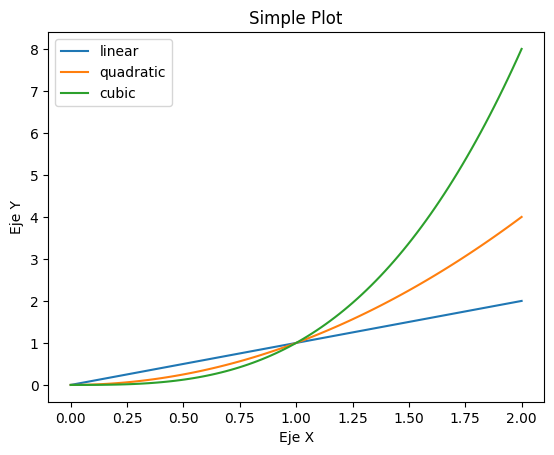

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)
#Generamos una grafica lineal para una recta en X
plt.plot(x, x, label='linear')
#Generamos otra grafica lineal para una X cuadratica
plt.plot(x, x**2, label='quadratic')
#Generamos una grafica lineas para una X Cubica
plt.plot(x, x**3, label='cubic')
#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title("Simple Plot")
plt.legend()
plt.savefig('grafica_lineal.png')
plt.show()

In [ ]:
mi_diccionario = {'a': -10, 'b': 20, 'c': -25}

# Obtener el valor con el módulo más alto del diccionario
max_valor_modulo = abs(max(mi_diccionario.values(), key=abs))

print("El valor con el módulo más alto del diccionario es:", max_valor_modulo)

El valor con el módulo más alto del diccionario es: 25


In [ ]:
for clave in mi_diccionario:
    mi_diccionario[clave] *= 4

print(mi_diccionario)

{'a': -40, 'b': 80, 'c': -100}


In [1]:
import numpy as np

In [12]:
def Input_Round_Calculation(Input,qinput_scale,Dimension_Input):
    '''Rounds one element of the input dataset

    Args:
        Input, one element of the input dataset in float
        qinput_scale, round-to-nearest quantization scale of the input
        Dimension_Input (int), size of the input vectors
    Returns:
        Input_Round (np.array), Input vector round-to-nearest quantization
   '''
    Input_Round=Input.copy()
    for i in range(0,Dimension_Input):
        Input_Round[i]=round(Input_Round[i]/qinput_scale)
    return Input_Round


def Input_Round_Calculation2(Input,qinput_scale,Dimension_Input):
    '''Rounds one element of the input dataset

    Args:
        Input, one element of the input dataset in float
        qinput_scale, round-to-nearest quantization scale of the input
        Dimension_Input (int), size of the input vectors
    Returns:
        Input_Round (np.array), Input vector round-to-nearest quantization
   '''
    Input_Round=Input.copy()
    Input_Round=round(Input_Round/qinput_scale)
    return Input_Round


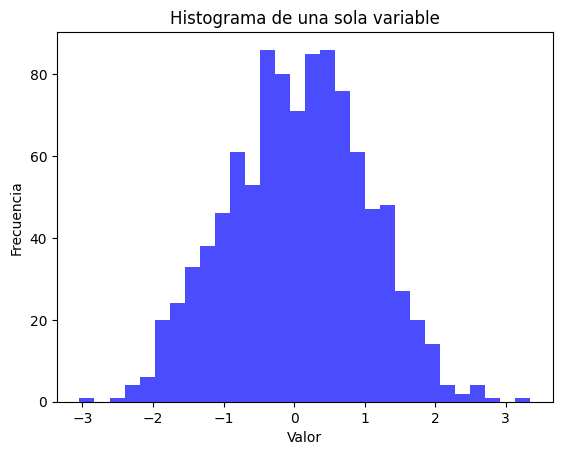

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos aleatorios
data = np.random.normal(loc=0, scale=1, size=1000)

# Crear el histograma
plt.hist(data, bins=30, color='blue', alpha=0.7)

# Personalizar la gráfica
plt.title('Histograma de una sola variable')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

In [11]:
kernel = np.random.uniform(-1, 1, size=(20,20))
bias = np.random.uniform(-1, 1, size=(20,))

####
#Obtengo el output a partir de la matriz de pesos el input y el bias
input_f = np.random.uniform(-1, 1, size=(1000,20))



output_f = np.zeros((input_f.shape[0], bias.shape[0]))
for i in range(0,input_f[:,0].shape[0]):
    output_f[i]=kernel.dot(input_f[i])+bias

input_s=0.00392156862745098
kernel_s=0.29605820775032043
bias_s=0.0011610125794130214

xdim=input_f[0].shape
InputDimension=xdim[0]
ydim=bias.shape
OutputDimension=ydim[0]
Numero_datasets=input_f[:,0].shape[0]
Cuant=np.zeros((ydim[0],xdim[0]))
biasCuant=np.zeros((ydim[0]))
Cuant2=np.zeros((ydim[0],xdim[0]))
biasCuant2=np.zeros((ydim[0]))
Bterm1=np.zeros((InputDimension))
Bterm2=np.zeros((InputDimension*InputDimension))
Bterm3=np.zeros(1)
Bterm4=np.zeros(InputDimension)
Redondeo_Kernel=np.zeros((OutputDimension,InputDimension))
Redondeo_Bias=np.zeros((OutputDimension))
Redondeo_Kernel2=np.zeros((OutputDimension,InputDimension))
Redondeo_Bias2=np.zeros((OutputDimension))


import time

inicio = time.time()
alpha=1
# Código a medir
Input_Round=Input_Round_Calculation(input_f[alpha],input_s,InputDimension)
print(Input_Round)
# -------------
fin = time.time()
print(fin-inicio)


inicio = time.time()
alpha=1
# Código a medir
Input_Round=Input_Round_Calculation2(input_f[alpha],input_s,InputDimension)
print(Input_Round)
# -------------
fin = time.time()
print(fin-inicio)


[-165.  192.  121.  184.  -51.  118. -223.  199.  167.  -42.  232.  -74.
 -204.  241.  -85.  -10. -136.   18. -226. -236.]
0.0009903907775878906


NameError: name 'numpy' is not defined

In [20]:
import numpy as np
x = np.random.rand(3, 2)

y = np.sum(x, axis=0, keepdims=True)
print(y.shape)

(1, 2)


In [17]:
import numpy as np
from tensorflow import keras
from keras.models import load_model
x_test=np.load('C:/Users/sergio.muniz/Desktop/QUBO/itcl-quantization-toolkit/quantizer/qubo_adaround/X_test.npy')  
y_test=np.load('C:/Users/sergio.muniz/Desktop/QUBO/itcl-quantization-toolkit/quantizer/qubo_adaround/y_test.npy')  
model=load_model("C:/Users/sergio.muniz/Desktop/QUBO/itcl-quantization-toolkit/quantizer/qubo_adaround/models/Goog.h5")
model.evaluate(x_test,y_test)


6/6 [==============================] - 0s 1ms/step - loss: 4.2368e-06


4.236818767822115e-06

In [28]:
x_test=np.load('C:/Users/sergio.muniz/Desktop/QUBO/itcl-quantization-toolkit/quantizer/qubo_adaround/X_test.npy')  
print(x_test.shape)

(1229, 21)


In [8]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [53]:
x_test=np.array(data)
print(x_test.shape)

(2, 2)
